In [1]:
from matplotlib.pyplot import rcParams, tick_params
from matplotlib import rc

SIZE = 25
rc('font', size = SIZE)
rc('axes', titlesize=SIZE)
rcParams["figure.figsize"] = (13, 10)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman'] + rcParams['font.serif']

In [2]:
def prob(N, n):
    '''Probability distribution for first photon detecting at i-th bin
    Arguments:
        N [int]: Total number of time-bins
        n [float]: Product of mu, T and d
    Return:
        Probability distribution as a list
    '''
    from numpy import exp
    return [(exp(n/N)-1)*exp(-(-~i)*n/N)/(1-exp(-n)) for i in range(N)]

## $\chi^2$-distribution

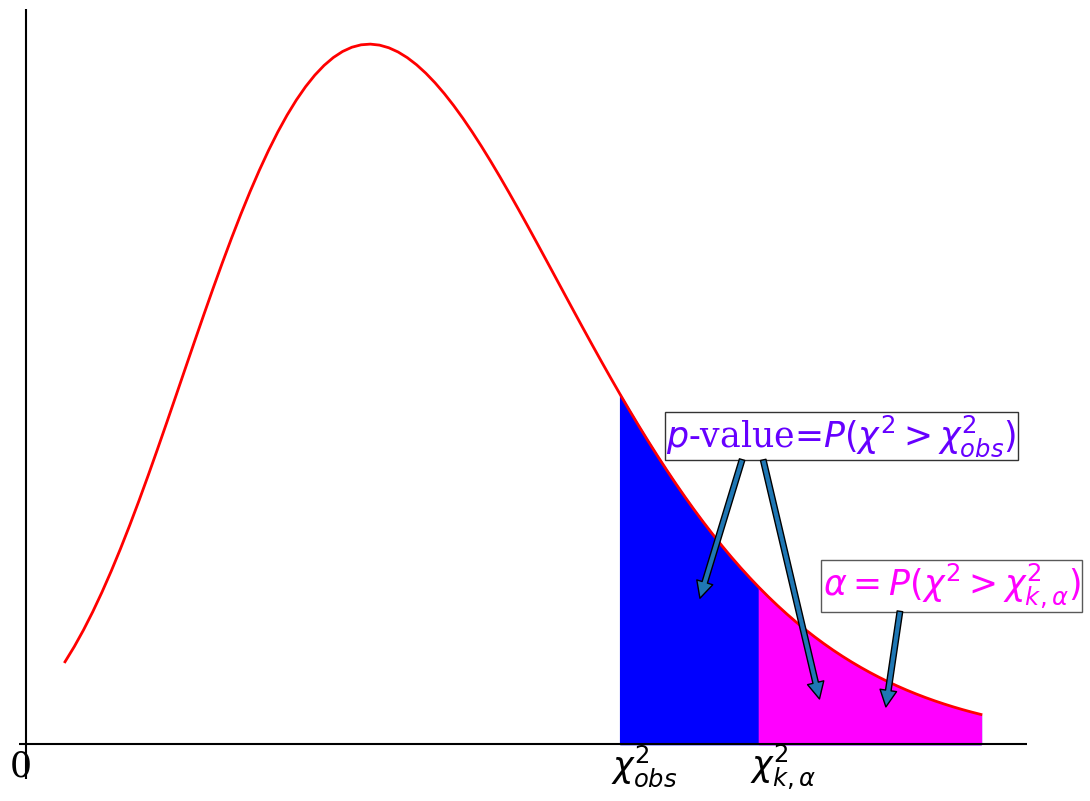

In [3]:
from scipy.stats import chi2
from numpy import linspace, arange

from matplotlib.pyplot import subplots, fill_between, show, arrow, axis, tick_params, savefig

fig, ax = subplots(1, 1)
df = 20
rv = chi2(df)
x = linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)
ax.plot(x, rv.pdf(x), 'r-', lw=2)
fill_between(x[60:], rv.pdf(x[60:]), color = '#00f')
fill_between(x[75:], rv.pdf(x[75:]), color = '#f0f')
ax.text(27.5, 0.028, r'$p$-value=$P(\chi^2>\chi^2_{obs})$', color = '#60f',
        bbox={'facecolor': '#fff', 'alpha': 0.8, 'pad': 1})
ax.text(32.5, 0.014, r'$\alpha=P(\chi^2>\chi^2_{k,\alpha})$', color = '#f0f',
        bbox={'facecolor': '#fff', 'alpha': 0.65, 'pad': 1})
ax.annotate('', xy = (34.5, 0.003), xytext = (35, 0.013), arrowprops = dict(shrink=0.05))
ax.annotate('', xy = (32.5, 0.003), xytext = (30.5, 0.028), arrowprops = dict(shrink=0.05))
ax.annotate('', xy = (28.5, 0.013), xytext = (30, 0.0275), arrowprops = dict(shrink=0.05))
ax.axvline(x = 7, color = 'k')
ax.axhline(y = 0, color = 'k')
ax.text(6.5, -0.003, 0)
ax.text(x[59], -0.003, r'$\chi^2_{obs}$')
ax.text(x[74], -0.003, r'$\chi^2_{k,\alpha}$')
axis('off')

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig('chisq.png', format="png", bbox_inches="tight")
show()

## Probability Plot for different $\mu Td$

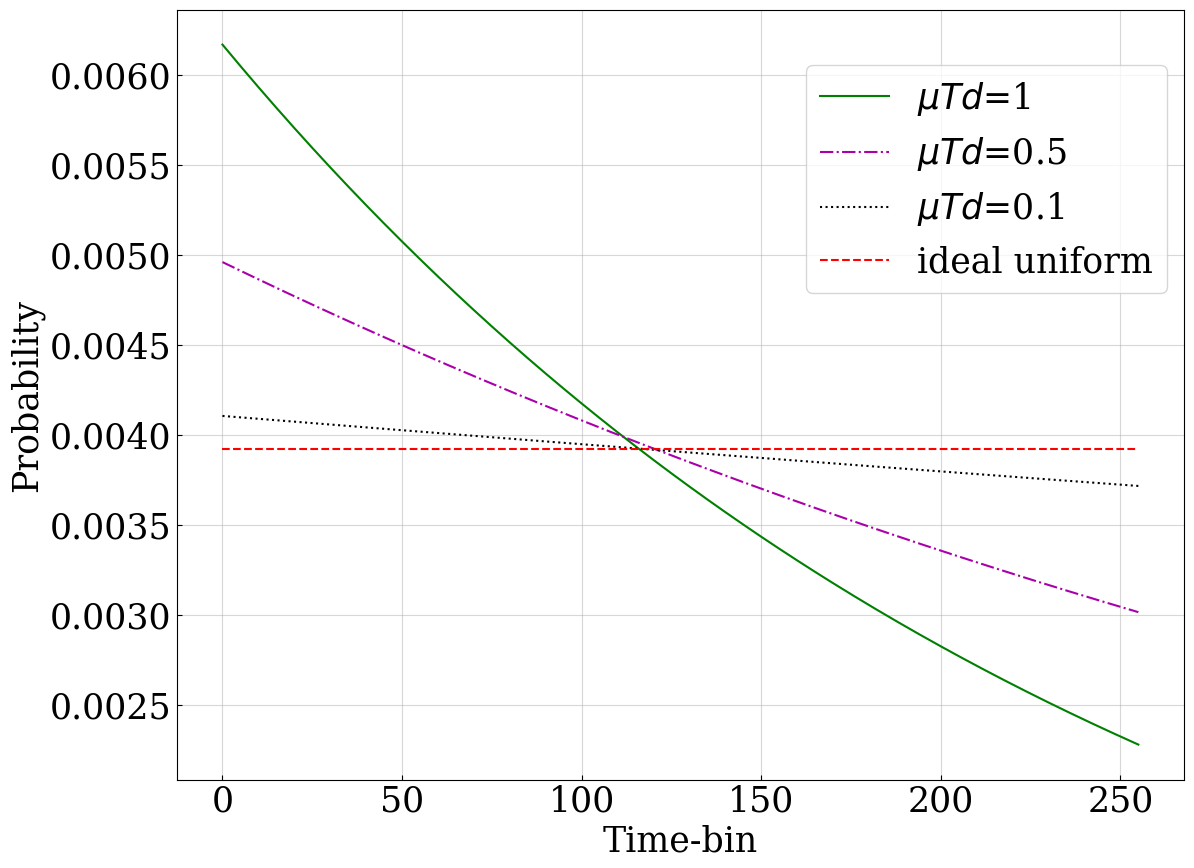

In [4]:
from numpy import exp
from pickle import load
from matplotlib.pyplot import subplots, legend, savefig, show, tick_params

fig, ax = subplots(1, 1)
lines = [':', '-.', '-'][::-1]
colrs = ['k', '#a0a', 'g'][::-1]
N = 256
i = 0
for muTd in [1, 0.5, 0.1]:
    ax.plot(range(N), prob(N, muTd), label = r'$\mu Td$'+f'={muTd}', color = colrs[i], ls = lines[i])    # Plot probability
    i += 1
    
ax.plot(range(N), [1/~-N]*(N), label = 'ideal uniform', ls = '--', color = 'r')    # Plot uniform probability

ax.set_xlabel('Time-bin')
ax.set_ylabel('Probability')

legend(loc = 1, bbox_to_anchor = (1, 0.95))
ax.grid(True, alpha = 0.5)

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig(f'Prob_plot.png', format="png", bbox_inches="tight")
show()

## $\mu Td$ vs Randomness

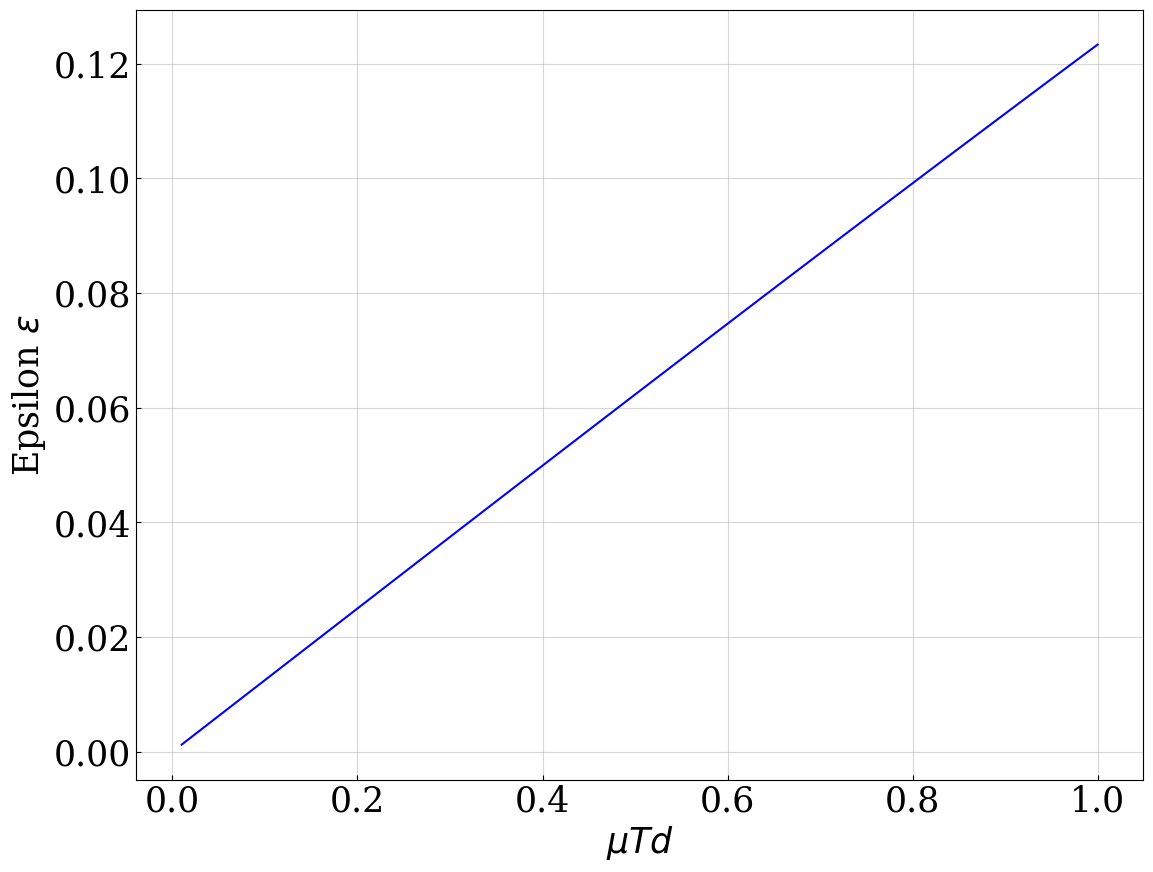

In [5]:
from matplotlib.pyplot import subplots, savefig, show, tick_params

N = 256
eps = []
inp = [i/100 for i in range(100,0,-1)]
for mu_Td in inp:
    val = 0
    pdf = prob(N, mu_Td)    # Get probabilities
    for p in pdf:
        val += abs(p-1/N)/2
    eps.append(val)

fig, ax = subplots(1, 1)
ax.plot(inp, eps, color = '#00f')
ax.set_xlabel(r'$\mu Td$')
ax.set_ylabel(r'Epsilon $\epsilon$')
ax.grid(True, alpha = 0.5)

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig('randomness.png', format="png", bbox_inches="tight")
show()

## Entropy

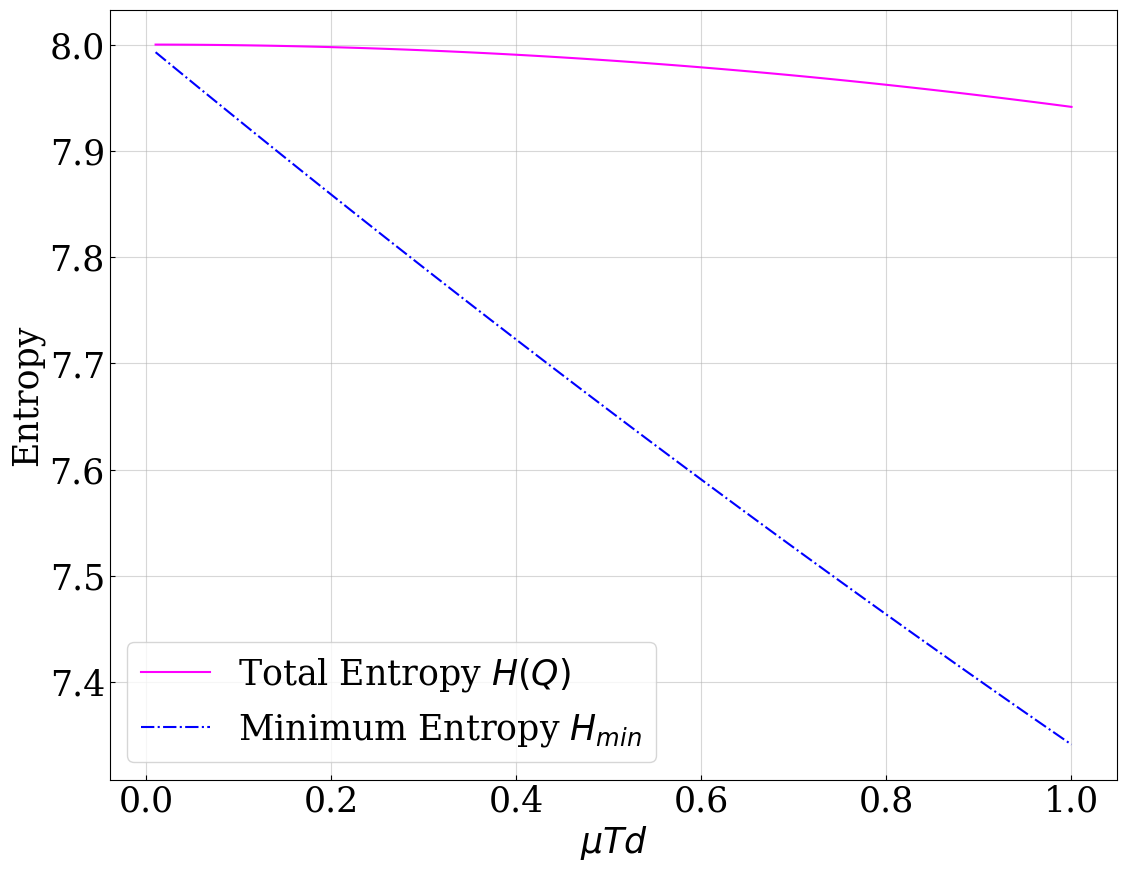

In [6]:
from math import exp, log2
from matplotlib.pyplot import subplots, legend, tick_params, savefig, show

N = 256
ent = []
eps = []
inp = [i/100 for i in range(1, 101)]
for mu_Td in inp:
    a = (exp(mu_Td/N)-1)/(1-exp(-mu_Td))
    b = exp(-mu_Td/N)
#     ent.append(a*mu_Td*log2(exp(1))*(b-(N+1)*b**(N+1)+N*b**(N+2))/(N*(1-b)**2)-a*log2(a)*b*(1-b**N)/(1-b))
    ent.append((1-(N+1)*exp(-mu_Td)+N*b**(N+1))*log2(1/b)/((1-exp(-mu_Td))*(1-b))-log2(a))
    eps.append(-log2((1-exp(-mu_Td/N))/(1-exp(-mu_Td))))

fig, ax = subplots(1, 1)
ax.plot(inp, ent, label = 'Total Entropy '+r'$H(Q)$', color = '#f0f')
ax.plot(inp, eps, label = 'Minimum Entropy '+r'$H_{min}$', color = '#00f', ls = '-.')
ax.set_xlabel(r'$\mu Td$')
ax.set_ylabel(r'Entropy')
legend()
ax.grid(True, alpha = 0.5)

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig('ent_act.png', format="png", bbox_inches="tight")
show()

## $\mu$ vs rate

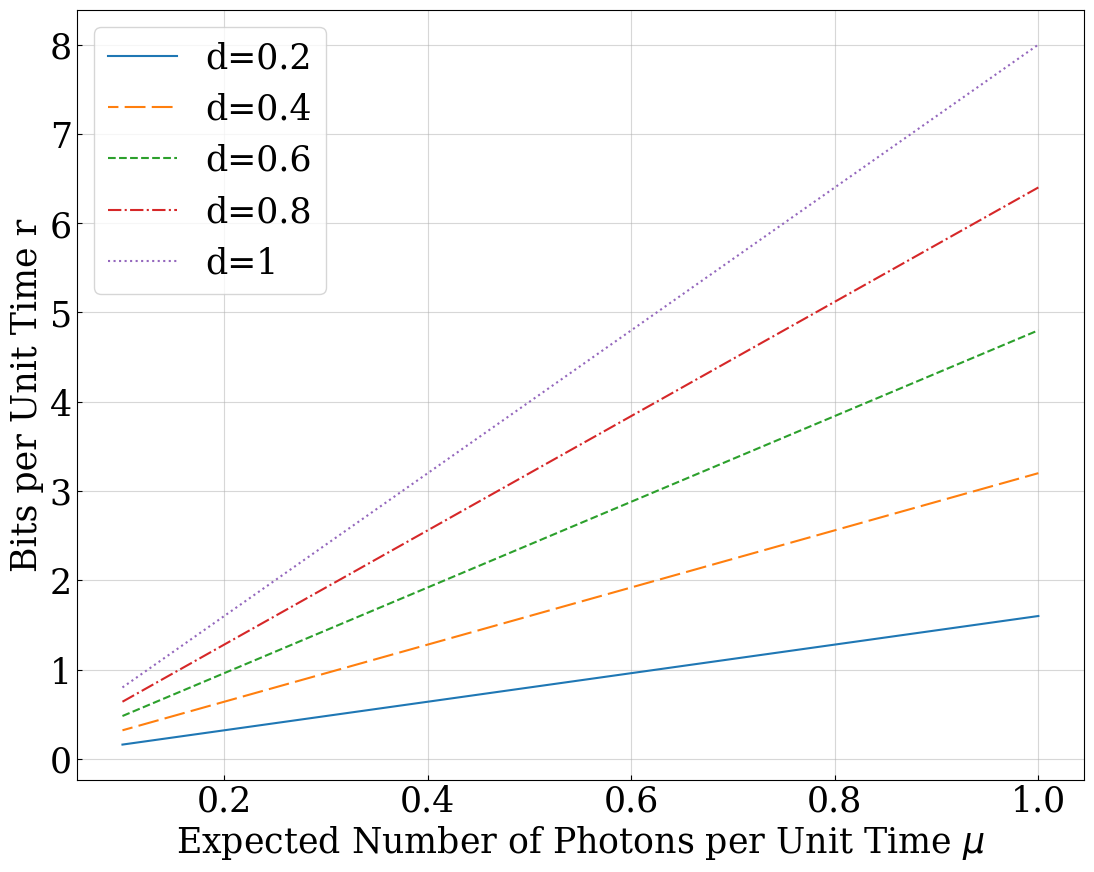

In [7]:
from matplotlib.pyplot import subplots, savefig, show, tick_params
from numpy import exp, log2

T = 1.5e-8
N = 256

mus = [i/10 for i in range(1,11)]
fig, ax = subplots(1, 1)

d = .2
r = [(exp(mu*T*d)-1)*log2(N)/T for mu in mus]
ax.plot(mus, r, label = f'd={d}')

d = .4
r = [(exp(mu*T*d)-1)*log2(N)/T for mu in mus]
ax.plot(mus, r, label = f'd={d}', ls = (5, (10, 3)))

d = .6
r = [(exp(mu*T*d)-1)*log2(N)/T for mu in mus]
ax.plot(mus, r, ls = '--', label = f'd={d}')

d = .8
r = [(exp(mu*T*d)-1)*log2(N)/T for mu in mus]
ax.plot(mus, r, ls = '-.', label = f'd={d}')

d = 1
r = [(exp(mu*T*d)-1)*log2(N)/T for mu in mus]
ax.plot(mus, r, ls = ':', label = f'd={d}')

ax.set_xlabel(r'Expected Number of Photons per Unit Time $\mu$')
ax.set_ylabel('Bits per Unit Time r')
ax.legend()
ax.grid(True, alpha = 0.5)

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig('murate.png', format="png", bbox_inches="tight")
show()

## $d$ vs rate

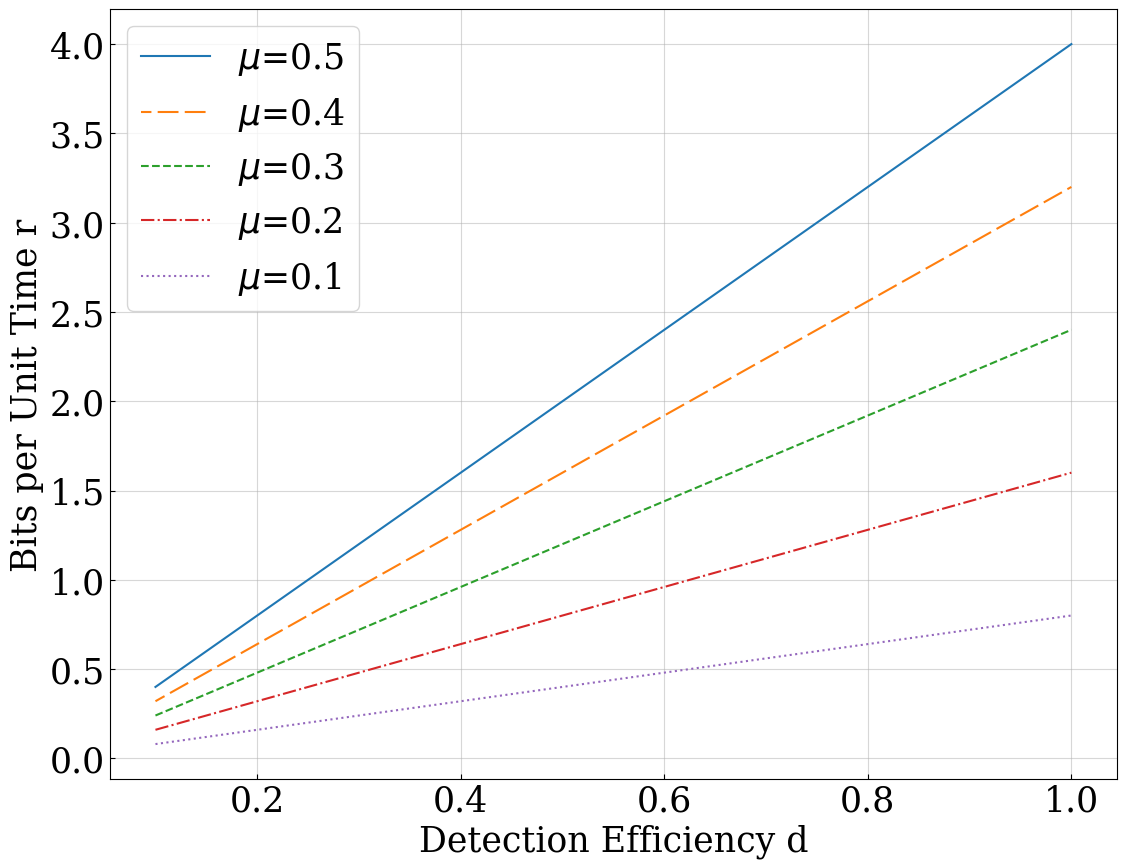

In [8]:
from matplotlib.pyplot import subplots, savefig, show, tick_params
from numpy import exp, log2

T = 1.5e-8
N = 256

ds = [i/10 for i in range(1,11)]
fig, ax = subplots(1, 1)

mu = .5
r = [(exp(mu*T*d)-1)*log2(N)/T for d in ds]
ax.plot(ds, r, label = r'$\mu$'+f'={mu}')

mu = .4
r = [(exp(mu*T*d)-1)*log2(N)/T for d in ds]
ax.plot(ds, r, label = r'$\mu$'+f'={mu}', ls = (5, (10, 3)))

mu = .3
r = [(exp(mu*T*d)-1)*log2(N)/T for d in ds]
ax.plot(ds, r, ls = '--', label = r'$\mu$'+f'={mu}')

mu = .2
r = [(exp(mu*T*d)-1)*log2(N)/T for d in ds]
ax.plot(ds, r, ls = '-.', label = r'$\mu$'+f'={mu}')

mu = .1
r = [(exp(mu*T*d)-1)*log2(N)/T for d in ds]
ax.plot(ds, r, ls = ':', label = r'$\mu$'+f'={mu}')

ax.set_xlabel(r'Detection Efficiency d')
ax.set_ylabel('Bits per Unit Time r')
ax.legend()
ax.grid(True, alpha = 0.5)

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig('drate.png', format="png", bbox_inches="tight")
show()

## $3D$-plot for rate

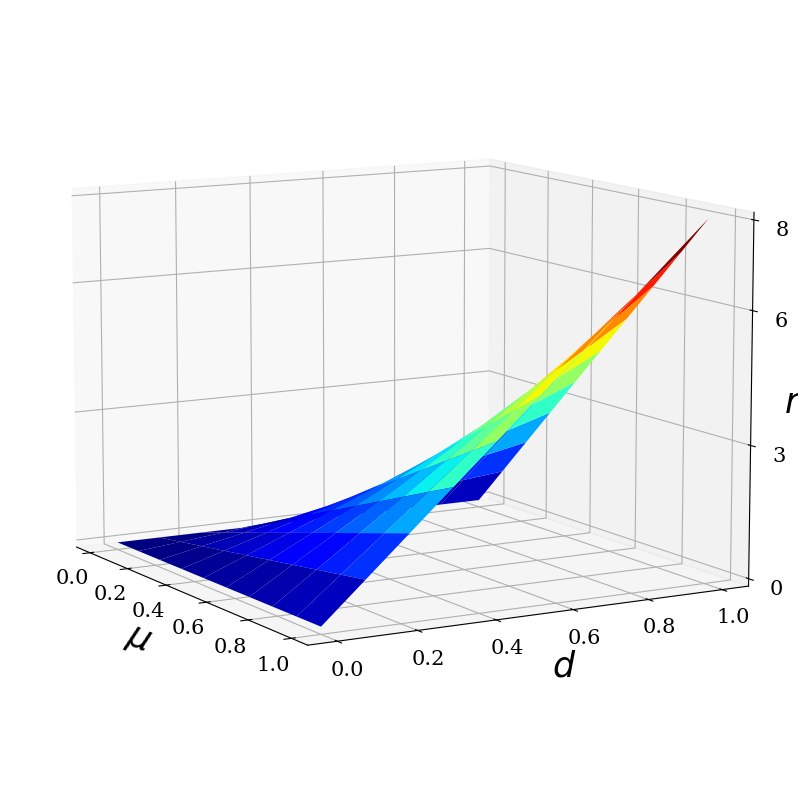

In [7]:
from numpy import outer, linspace, ones, zeros_like, exp, log2, meshgrid
from matplotlib.pyplot import figure, show, savefig, tick_params

rcParams.update({'xtick.labelsize':15})

# Define constants
T = 1.5e-8
N = 256

# Generate meshgrid for mus and ds
mus = outer(linspace(0, 1, 10), ones(10))
ds = outer(linspace(0, 1, 10), ones(10)).T  # Transpose to match dimensions

# Initialize figure and subplot for 3D plot
fig = figure()
ax = fig.add_subplot(111, projection='3d')

# Calculate r values
r = zeros_like(mus)
for i in range(len(mus)):
    for j in range(len(ds)):
        r[i, j] = (exp(mus[i, j] * T * ds[i, j]) - 1) * log2(N) / T

# Plot the surface
mus, ds = meshgrid(linspace(0, 1, 10), linspace(0, 1, 10))
ax.plot_surface(mus, ds, r, cmap = 'jet')

# Set labels and title
ax.set_xlabel(r'$\mu$', labelpad = 10, fontsize = 25)
ax.set_ylabel(r'$d$', labelpad = 10, fontsize = 25)
ax.set_zlabel(r'$r$', labelpad = -4, fontsize = 25)
# ax.set_title('Surface plot of random number generation rate')

ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_zticks([0, 3, 6, 8])
  
ax.view_init(10, -30) 

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig('mudrate.png', format="png", bbox_inches="tight")

# Show plot
show()

## Heat Map

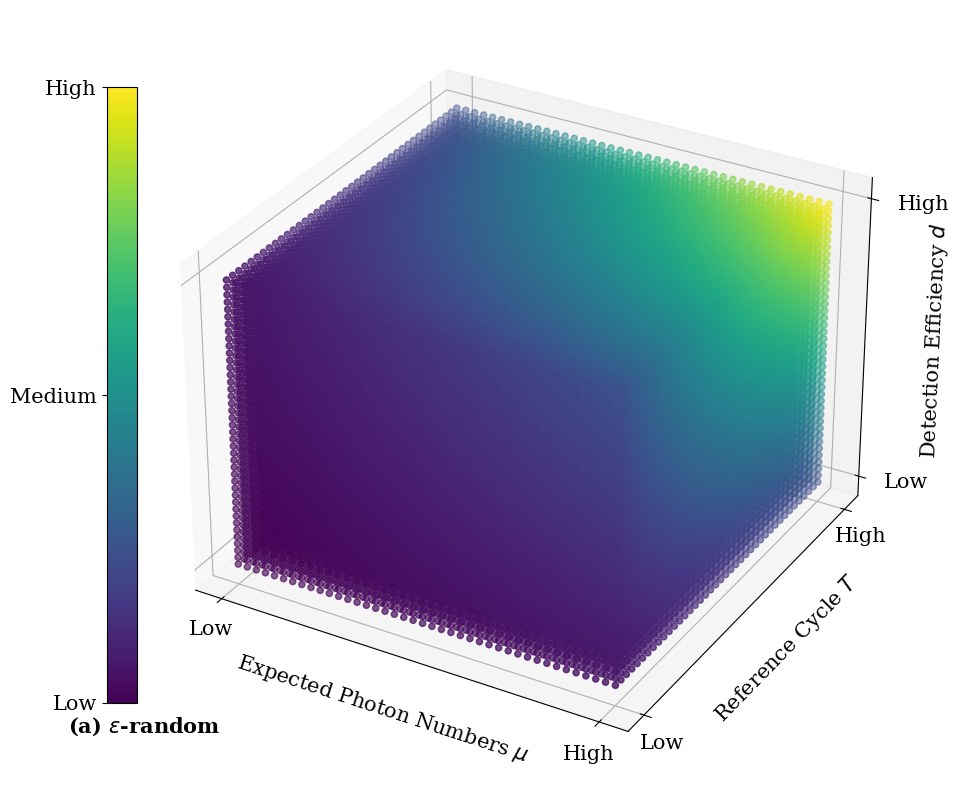

In [28]:
from numpy import linspace, meshgrid, exp
from matplotlib.pyplot import figure, tick_params, savefig, show, xticks, yticks

x = y = z = linspace(0.1, 0.4, 41)
X, Y, Z = meshgrid(x, y, z)
values = 0.5*(1-exp(-X*Y*Z/2))/(1+exp(-X*Y*Z/2))

fig = figure()
ax = fig.add_subplot(111, projection = '3d')
scatter = ax.scatter(X[::-1], Y, Z, c = values)
cbar = fig.colorbar(scatter, ticks = [0.5*(1-exp(-0.001/2))/(1+exp(-0.001/2)), (0.5*(1-exp(-0.001/2))/(1+exp(-0.001/2))+0.5*(1-exp(-0.064/2))/(1+exp(-0.064/2)))/2, 0.5*(1-exp(-0.064/2))/(1+exp(-0.064/2))], location = 'left', shrink = 0.8, pad = 0)
cbar.ax.set_yticklabels(['High', 'Medium', 'Low'][::-1], fontsize = 15)
xticks([0.1, .4])
ax.set_xticklabels(['Low', 'High'], fontsize = 15)
yticks([0.1, .4])
ax.set_yticklabels(['Low', 'High'], fontsize = 15)
ax.set_zticks([0.1, .4])
ax.set_zticklabels(['Low', 'High'], ha = 'left', fontsize = 15)

ax.set_xlabel(r'Expected Photon Numbers $\mu$', labelpad = 5, fontsize = 15)
ax.set_ylabel(r'Reference Cycle $T$', labelpad = 5, fontsize = 15)
ax.set_zlabel(r'Detection Efficiency $d$    ', labelpad = 10, fontsize = 15)

ax.text(0.15, -0.17, 0.15, r'(a) $\epsilon$-random', weight = 'bold', fontsize = 15)

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig('h_mapa.png', format="png", bbox_inches="tight")

show()

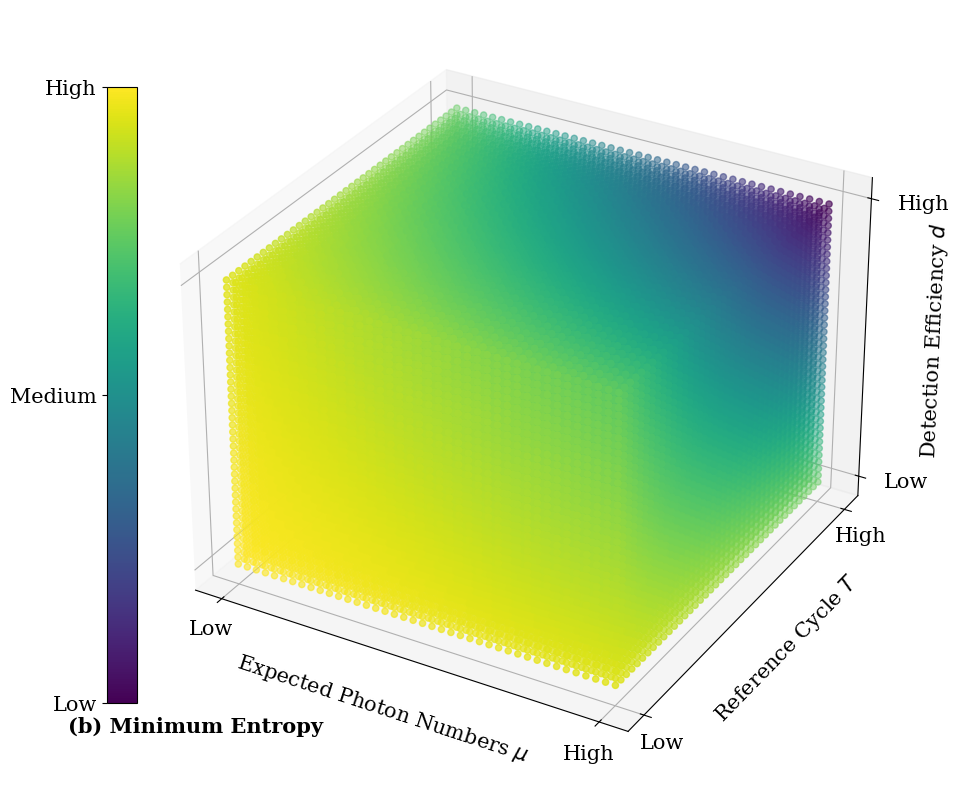

In [30]:
from numpy import linspace, meshgrid, exp, log2
from matplotlib.pyplot import figure, tick_params, savefig, show, xticks, yticks

x = y = z = linspace(0.1, 0.4, 41)
X, Y, Z = meshgrid(x, y, z)
values = log2((1-exp(-X*Y*Z))/(1-exp(-X*Y*Z/256)))

fig = figure()
ax = fig.add_subplot(111, projection = '3d')
scatter = ax.scatter(X[::-1], Y, Z, c = values)
cbar = fig.colorbar(scatter, ticks = [log2((1-exp(-0.001))/(1-exp(-0.001/256))), (log2((1-exp(-0.001))/(1-exp(-0.001/256)))+log2((1-exp(-0.064))/(1-exp(-0.064/256))))/2, log2((1-exp(-0.064))/(1-exp(-0.064/256)))], location = 'left', shrink = 0.8, pad = 0)
cbar.ax.set_yticklabels(['High', 'Medium', 'Low'], fontsize = 15)
xticks([0.1, .4])
ax.set_xticklabels(['Low', 'High'], fontsize = 15)
yticks([0.1, .4])
ax.set_yticklabels(['Low', 'High'], fontsize = 15)
ax.set_zticks([0.1, .4])
ax.set_zticklabels(['Low', 'High'], ha = 'left', fontsize = 15)

ax.set_xlabel(r'Expected Photon Numbers $\mu$', labelpad = 5, fontsize = 15)
ax.set_ylabel(r'Reference Cycle $T$', labelpad = 5, fontsize = 15)
ax.set_zlabel(r'Detection Efficiency $d$    ', labelpad = 10, fontsize = 15)

ax.text(0.15, -0.17, 0.15, r'(b) Minimum Entropy', weight = 'bold', fontsize = 15)

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig('h_mapb.png', format="png", bbox_inches="tight")

show()

/tmp/ipykernel_1693415/8932463.py:8: RuntimeWarning: invalid value encountered in divide
  values = (exp(X*Y*Z)-1)*log2(N)/Y


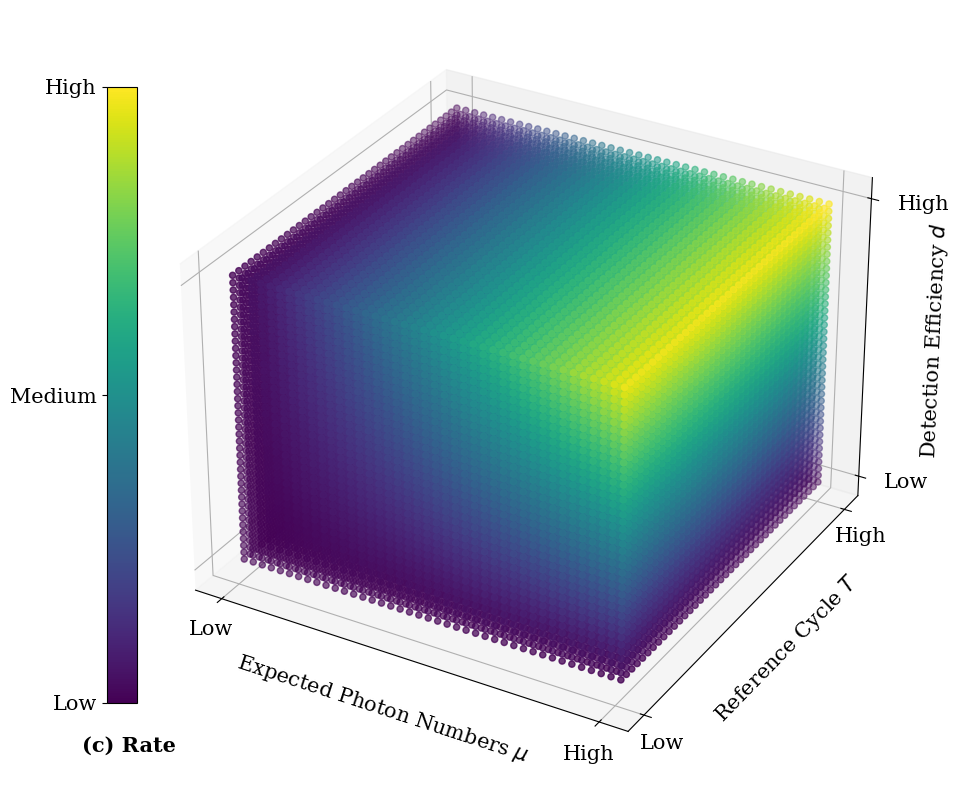

In [26]:
from matplotlib.pyplot import figure, xticks, yticks, tick_params, savefig, show
from numpy import linspace, meshgrid, exp, log2

N = 256

x = y = z = linspace(0, 0.4, 41)
X, Y, Z = meshgrid(x, y, z)
values = (exp(X*Y*Z)-1)*log2(N)/Y

fig = figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X, Y, Z, c = values)
cbar = fig.colorbar(scatter, ticks = [0, 8*(exp(0.064)-1)/0.8, 8*(exp(0.064)-1)/0.4], location='left', shrink = 0.8, pad = 0)
cbar.ax.set_yticklabels(['Low', 'Medium', 'High'], fontsize = 15)
xticks([0, .4])
ax.set_xticklabels(['Low', 'High'], fontsize = 15)
yticks([0, .4])
ax.set_yticklabels(['Low', 'High'], fontsize = 15)
ax.set_zticks([0, .4])
ax.set_zticklabels(['Low', 'High'], ha = 'left', fontsize = 15)

ax.set_xlabel(r'Expected Photon Numbers $\mu$', labelpad = 5, fontsize = 15)
ax.set_ylabel(r'Reference Cycle $T$', labelpad = 5, fontsize = 15)
ax.set_zlabel(r'Detection Efficiency $d$    ', labelpad = 10, fontsize = 15)

ax.text(0.05, -0.32, 0, '(c) Rate', weight = 'bold', fontsize = 15)

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig('h_mapc.png', format="png", bbox_inches="tight")

show()

/tmp/ipykernel_1693415/232691544.py:8: RuntimeWarning: divide by zero encountered in divide
  values = 40*Z+1/(20*X)


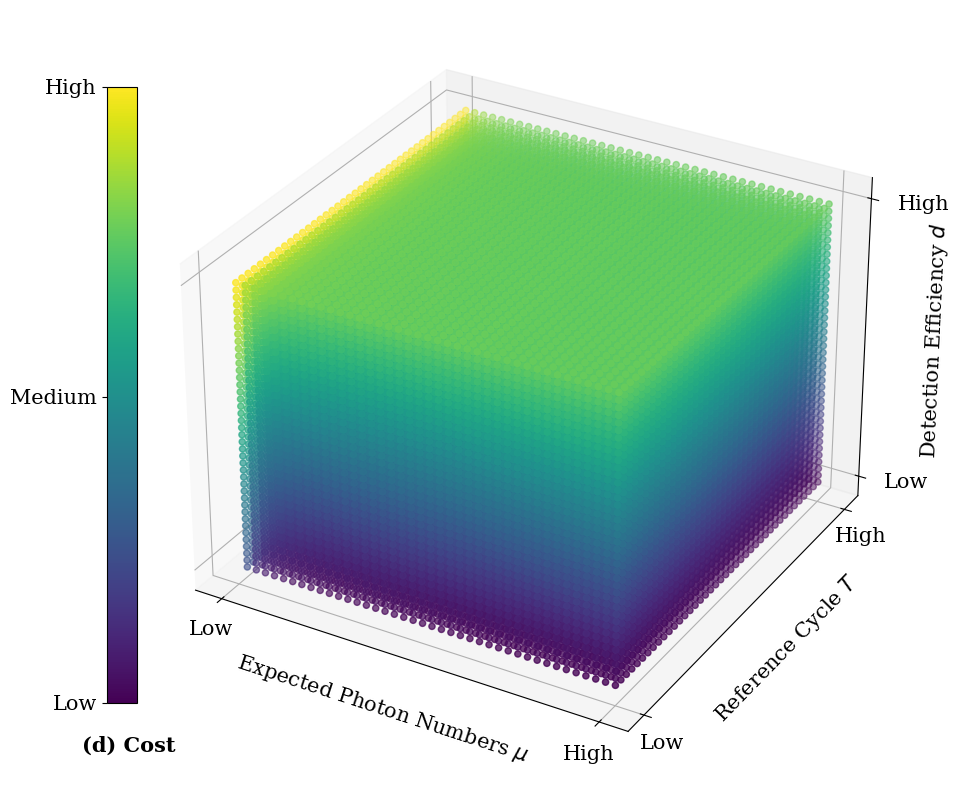

In [27]:
from matplotlib.pyplot import figure, xticks, yticks, tick_params, savefig, show
from numpy import linspace, meshgrid, exp

N = 256

x = y = z = linspace(0, .4, 41)
X, Y, Z = meshgrid(x, y, z)
values = 40*Z+1/(20*X)

fig = figure()
ax = fig.add_subplot(111, projection = '3d')
scatter = ax.scatter(X, Y, Z, c = values)
cbar = fig.colorbar(scatter, ticks = [1/8, 10.5, 21], location = 'left', shrink = 0.8, pad = 0)
cbar.ax.set_yticklabels(['Low', 'Medium', 'High'], fontsize = 15)
xticks([0, .4])
ax.set_xticklabels(['Low', 'High'], fontsize = 15)
yticks([0, .4])
ax.set_yticklabels(['Low', 'High'], fontsize = 15)
ax.set_zticks([0, .4])
ax.set_zticklabels(['Low', 'High'], ha = 'left', fontsize = 15)

ax.set_xlabel(r'Expected Photon Numbers $\mu$', labelpad = 5, fontsize = 15)
ax.set_ylabel(r'Reference Cycle $T$', labelpad = 5, fontsize = 15)
ax.set_zlabel(r'Detection Efficiency $d$    ', labelpad = 10, fontsize = 15)

ax.text(0.05, -0.32, 0, '(d) Cost', weight = 'bold', fontsize = 15)

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig('h_mapd.png', format="png", bbox_inches="tight")

show()

## Maximum Rate

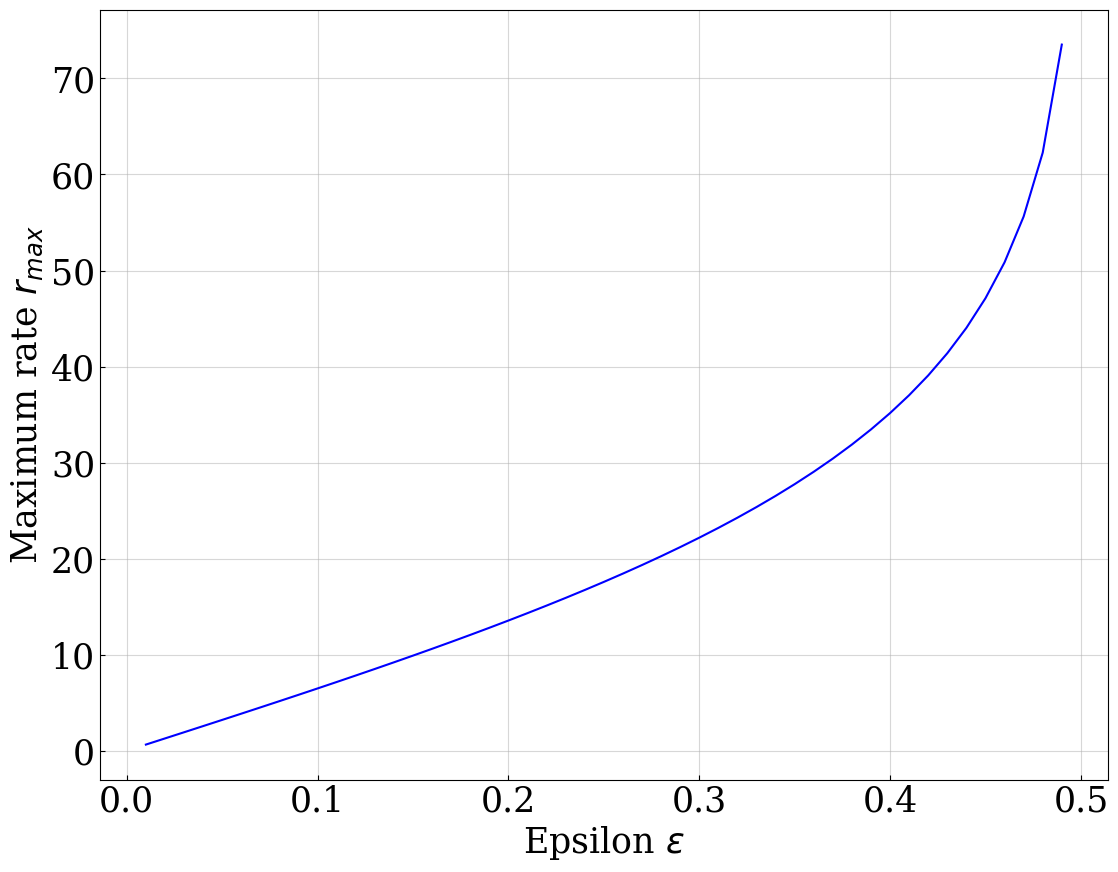

In [19]:
from matplotlib.pyplot import subplots, tick_params, savefig, show
from numpy import log, log2

N = 256

eps = [i/100 for i in range(1, 50)]
r_max = [2*log2(N)*log((1+2*e)/(1-2*e)) for e in eps]

fig, ax = subplots(1, 1)
ax.plot(eps, r_max, color = '#00f')
ax.set_ylabel(r'Maximum rate $r_{max}$')
ax.set_xlabel(r'Epsilon $\epsilon$')
ax.grid(True, alpha = 0.5)

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig('max_rate.png', format="png", bbox_inches="tight")

show()

## Minimum Entropy

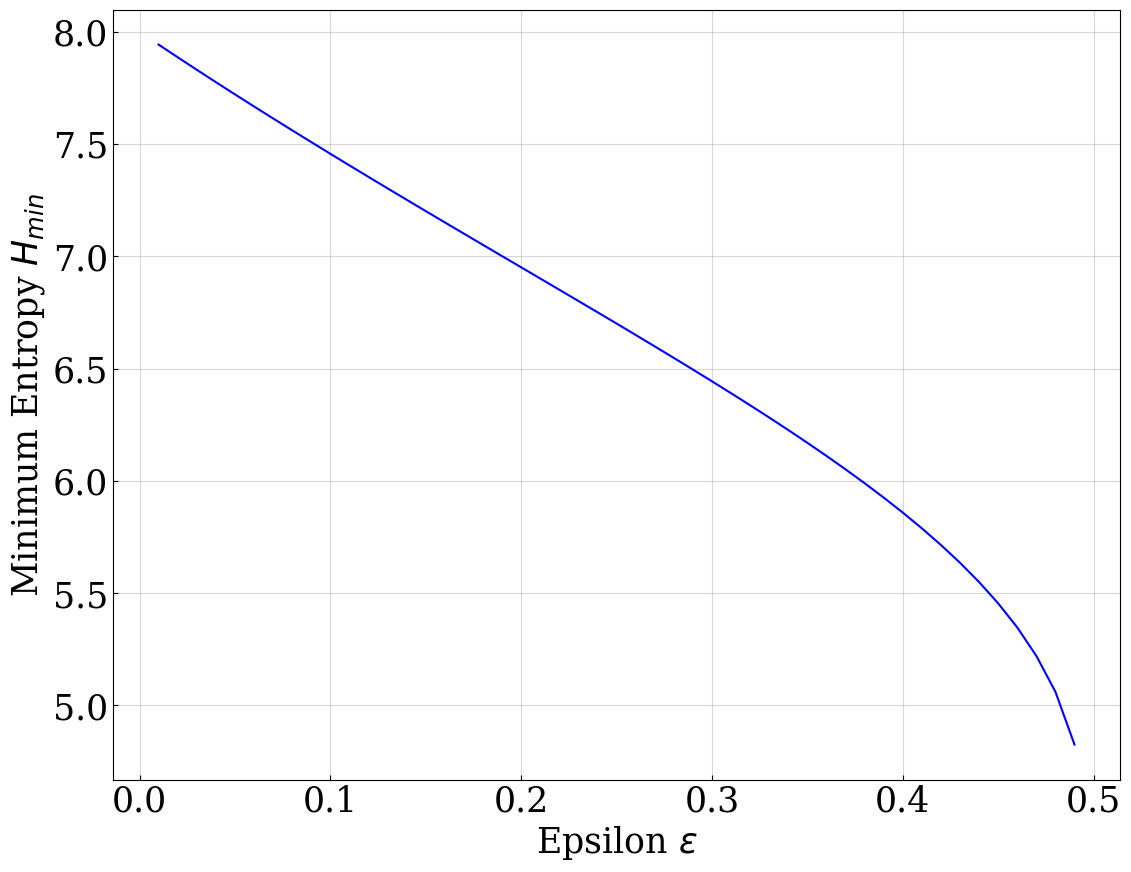

In [17]:
from matplotlib.pyplot import subplots, tick_params, savefig, show
from numpy import log, log2

N = 256

eps = [i/100 for i in range(1, 50)]
H_min = [log2((8*e)/((1+2*e)**2*(1-((1-2*e)/(1+2*e))**(2/N)))) for e in eps]

fig, ax = subplots(1, 1)
ax.plot(eps, H_min, color = '#00f')
ax.set_ylabel(r'Minimum Entropy $H_{min}$')
ax.set_xlabel(r'Epsilon $\epsilon$')
ax.grid(True, alpha = 0.5)

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig('min_ent.png', format="png", bbox_inches="tight")

show()

## NIST $p$-values

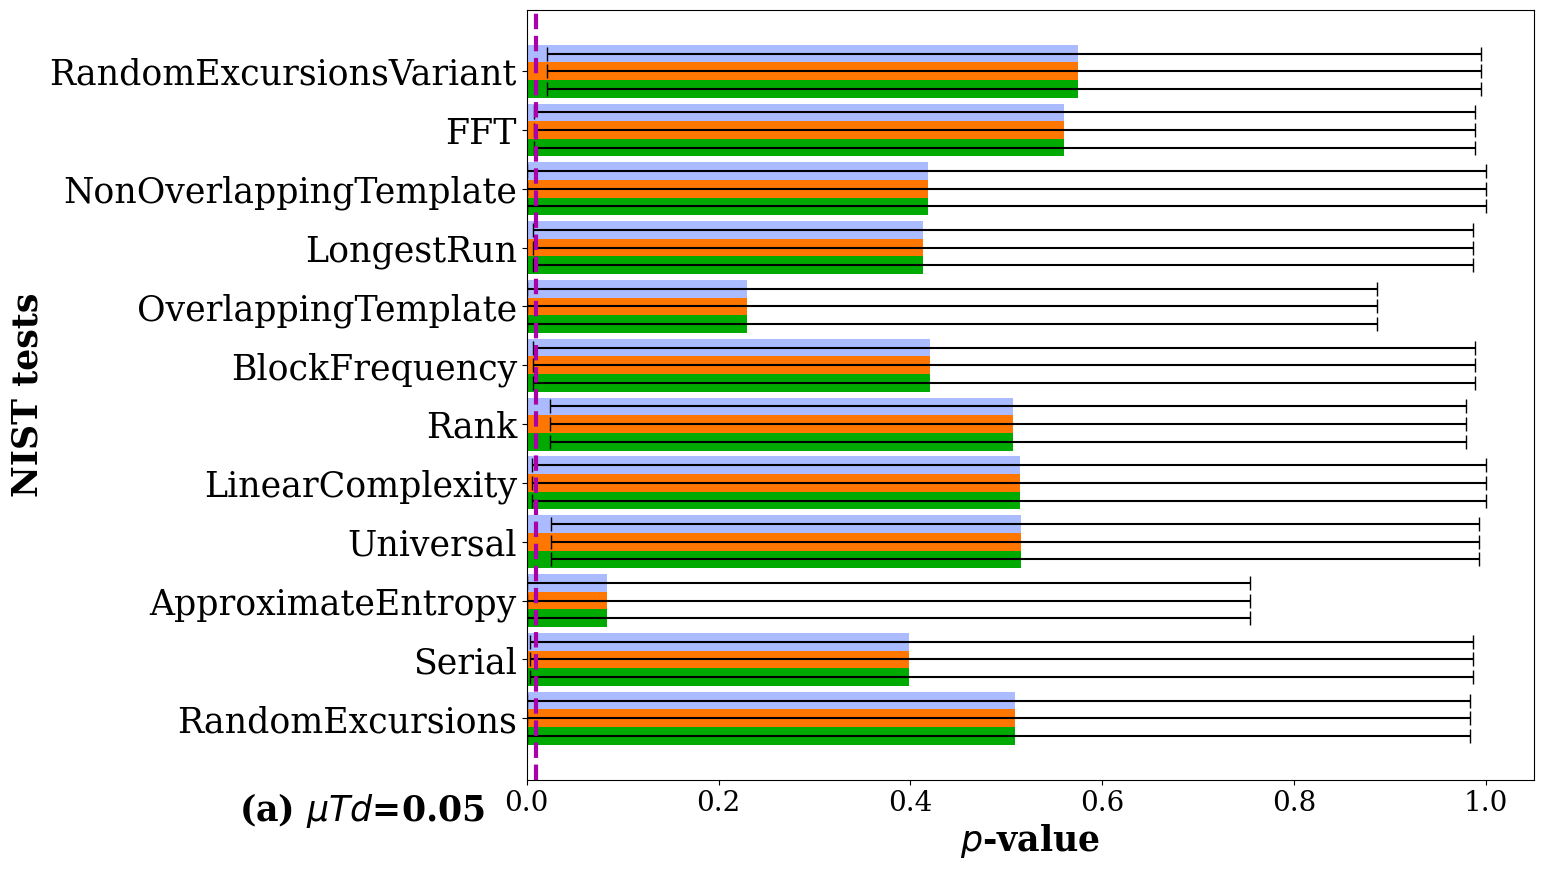

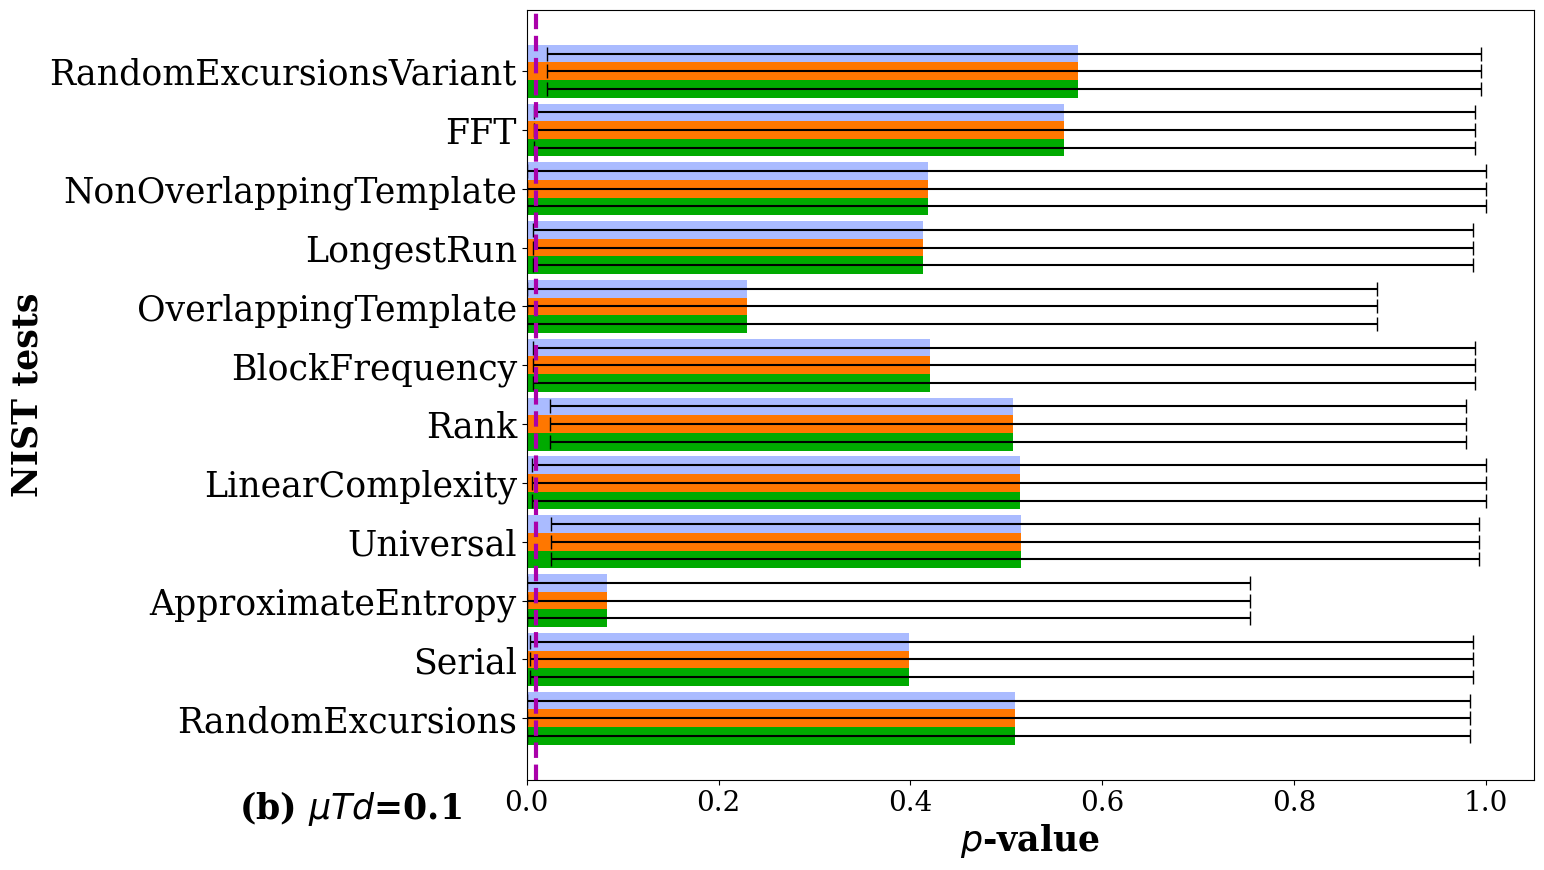

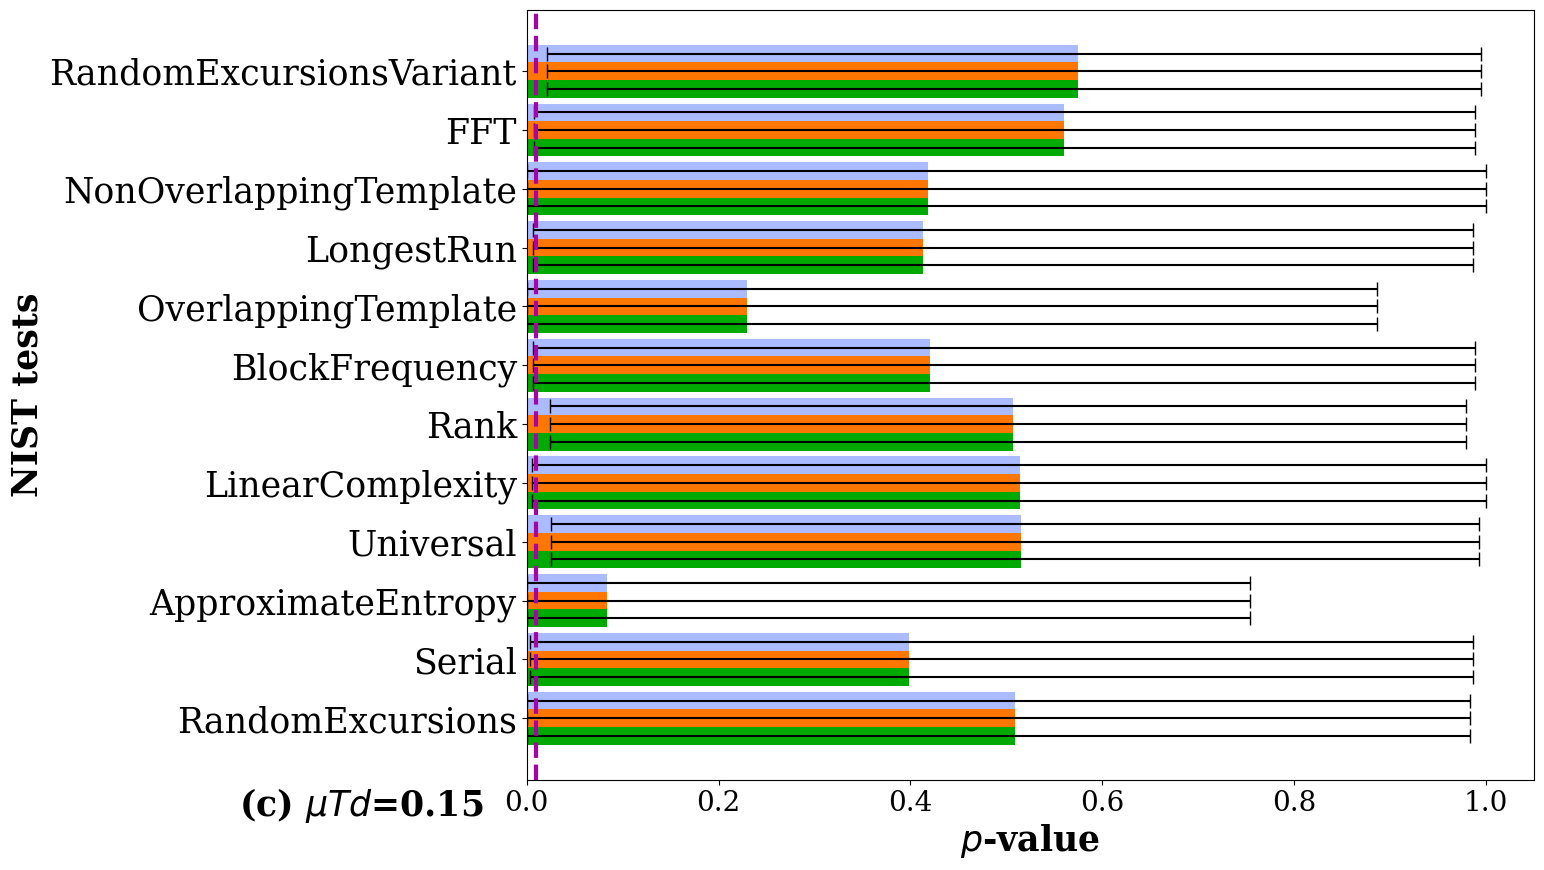

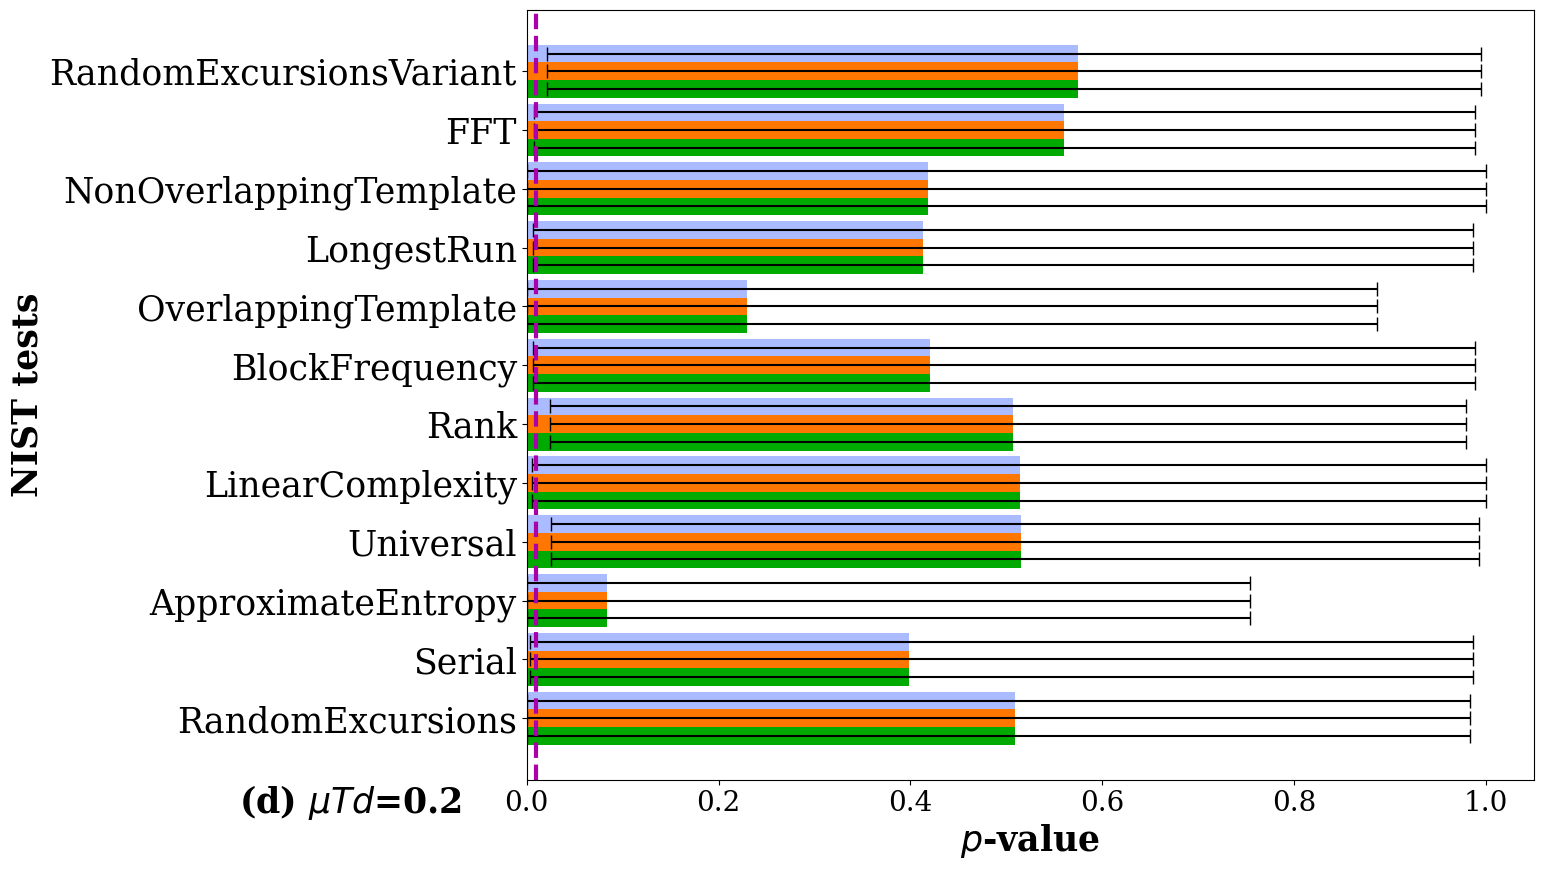

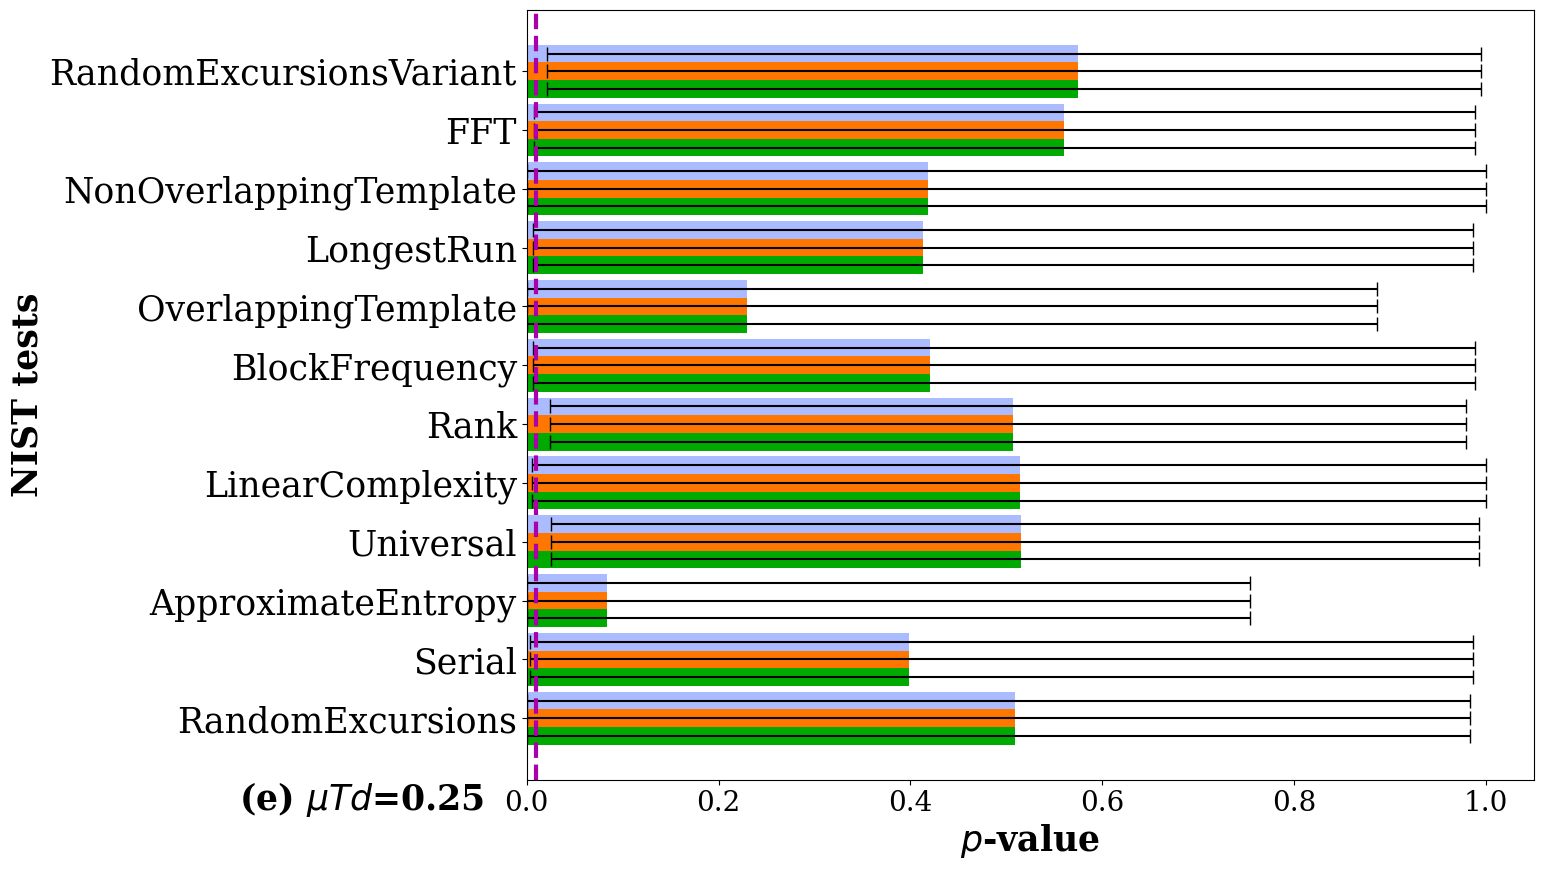

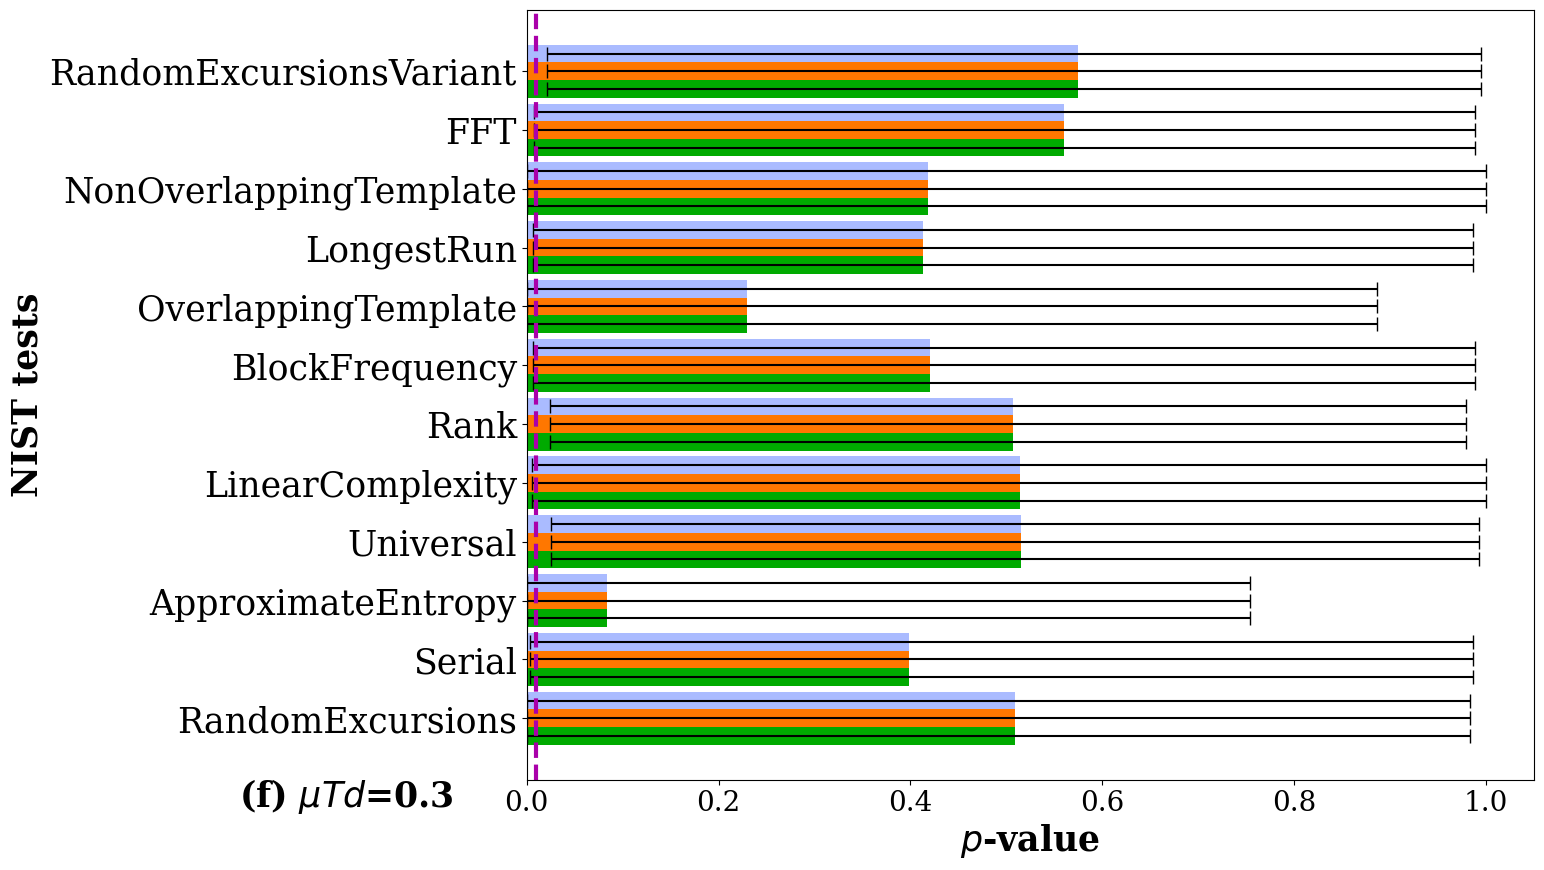

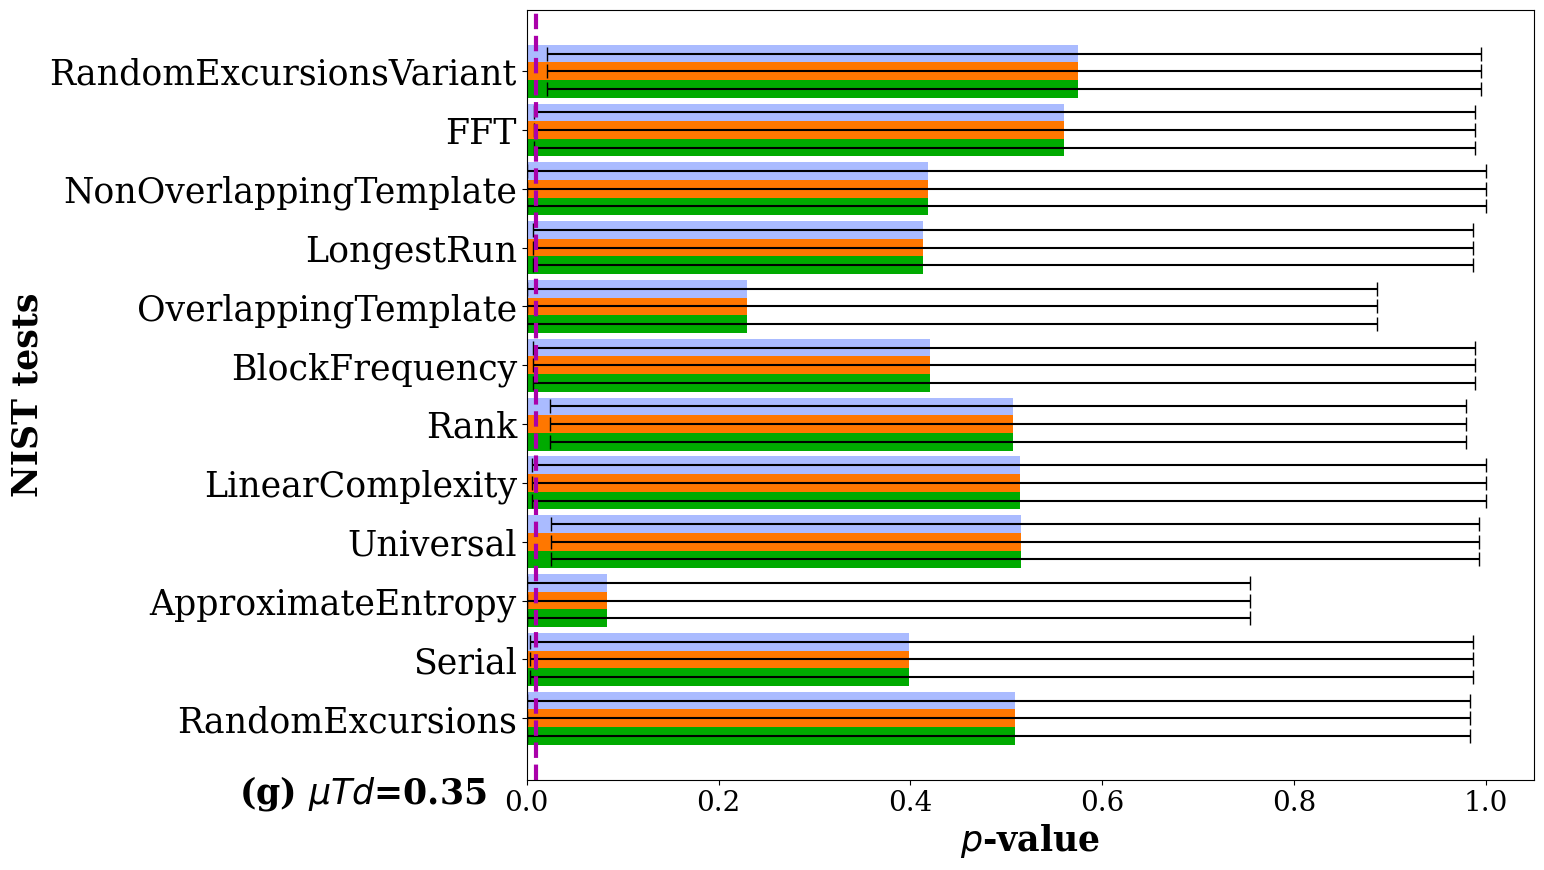

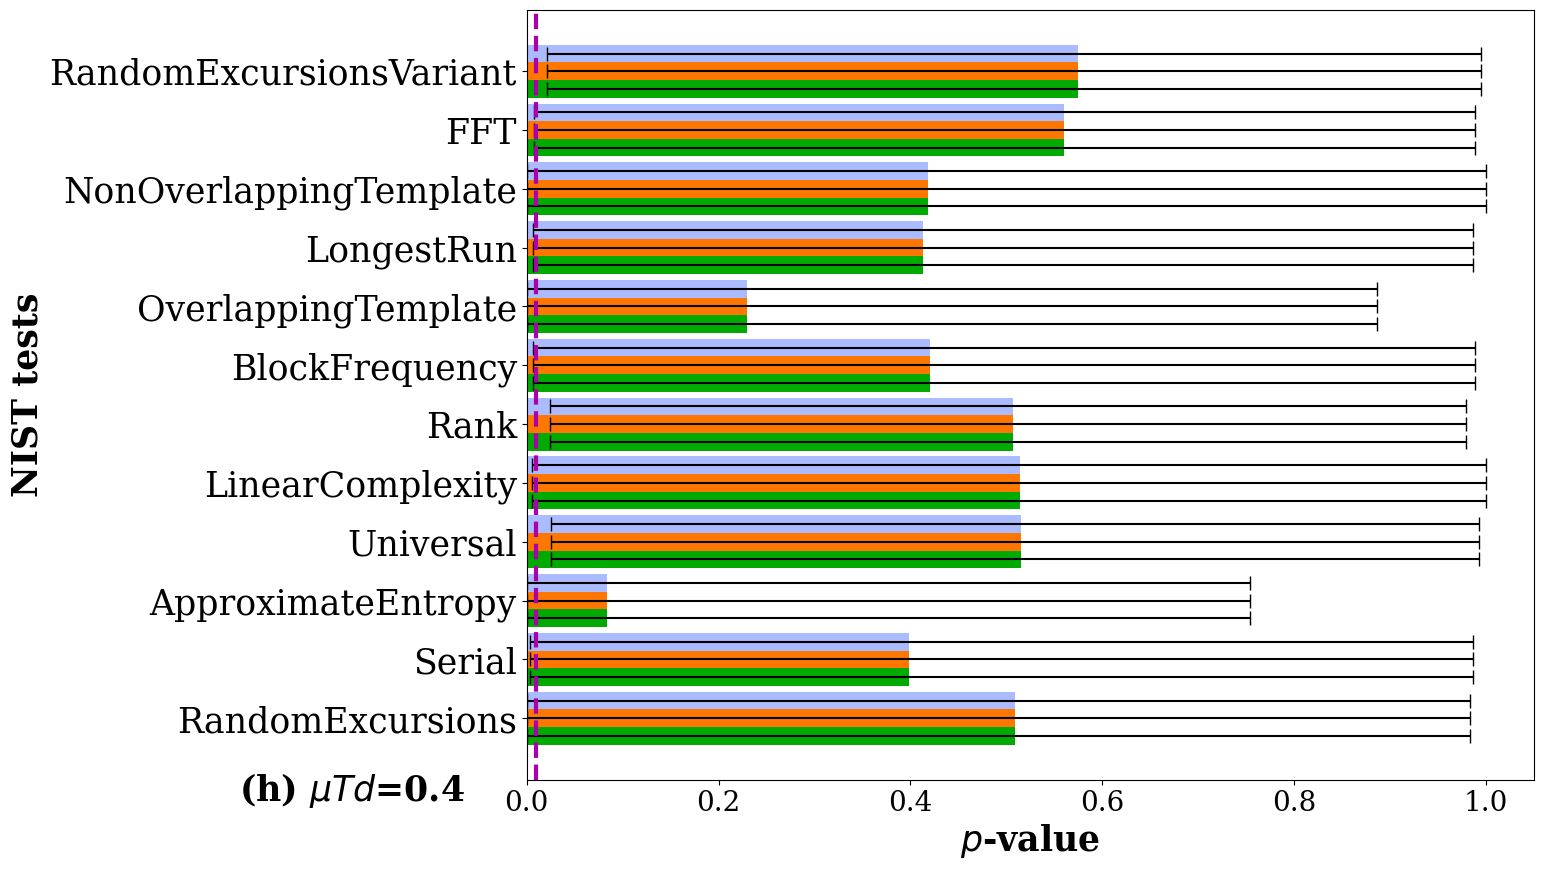

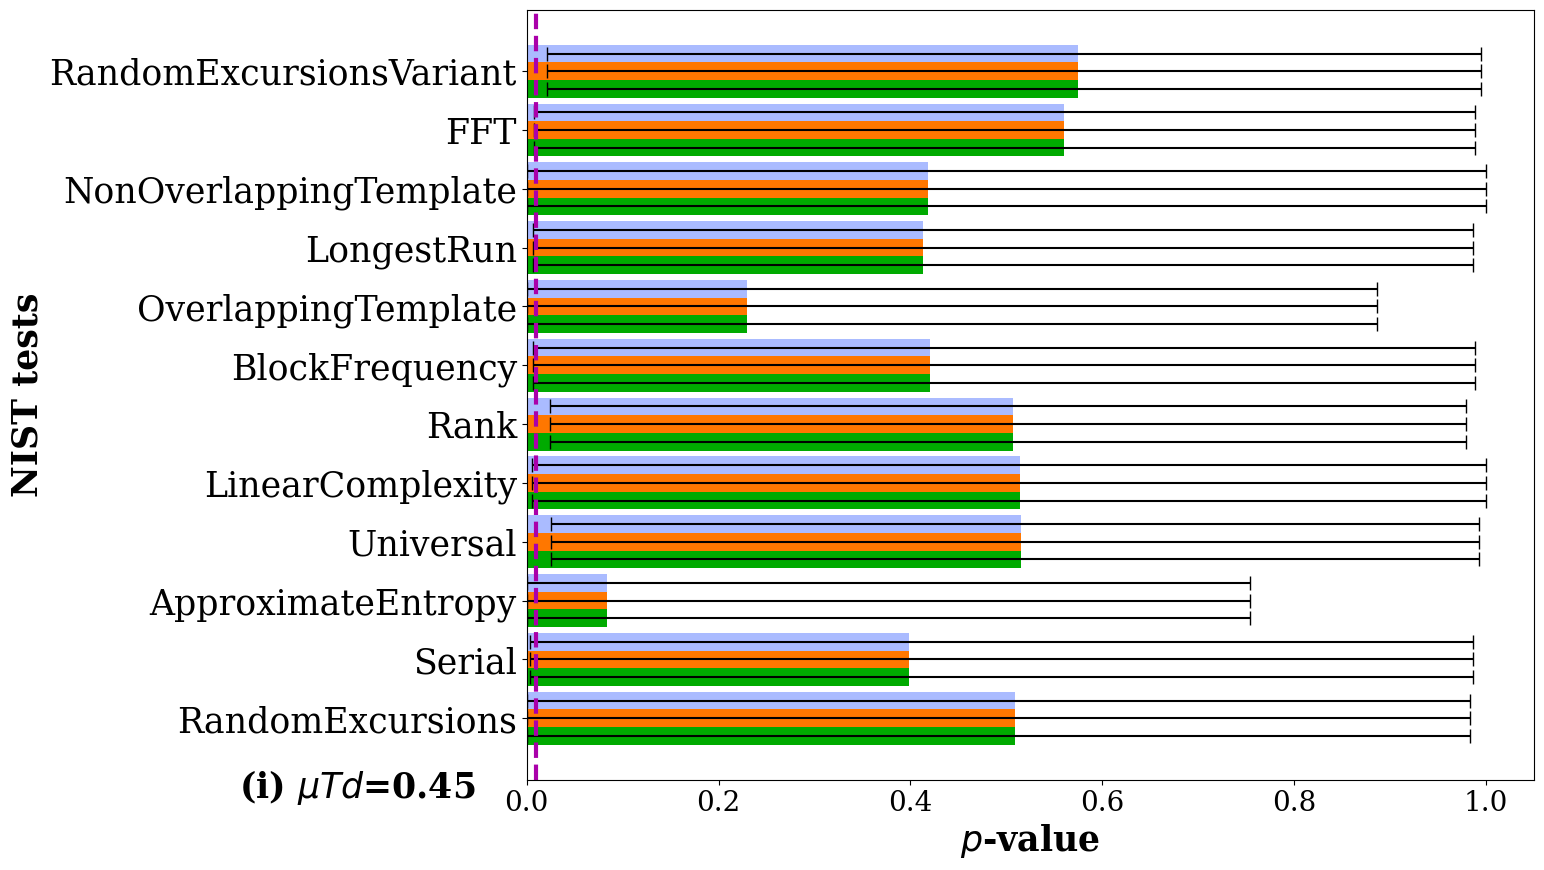

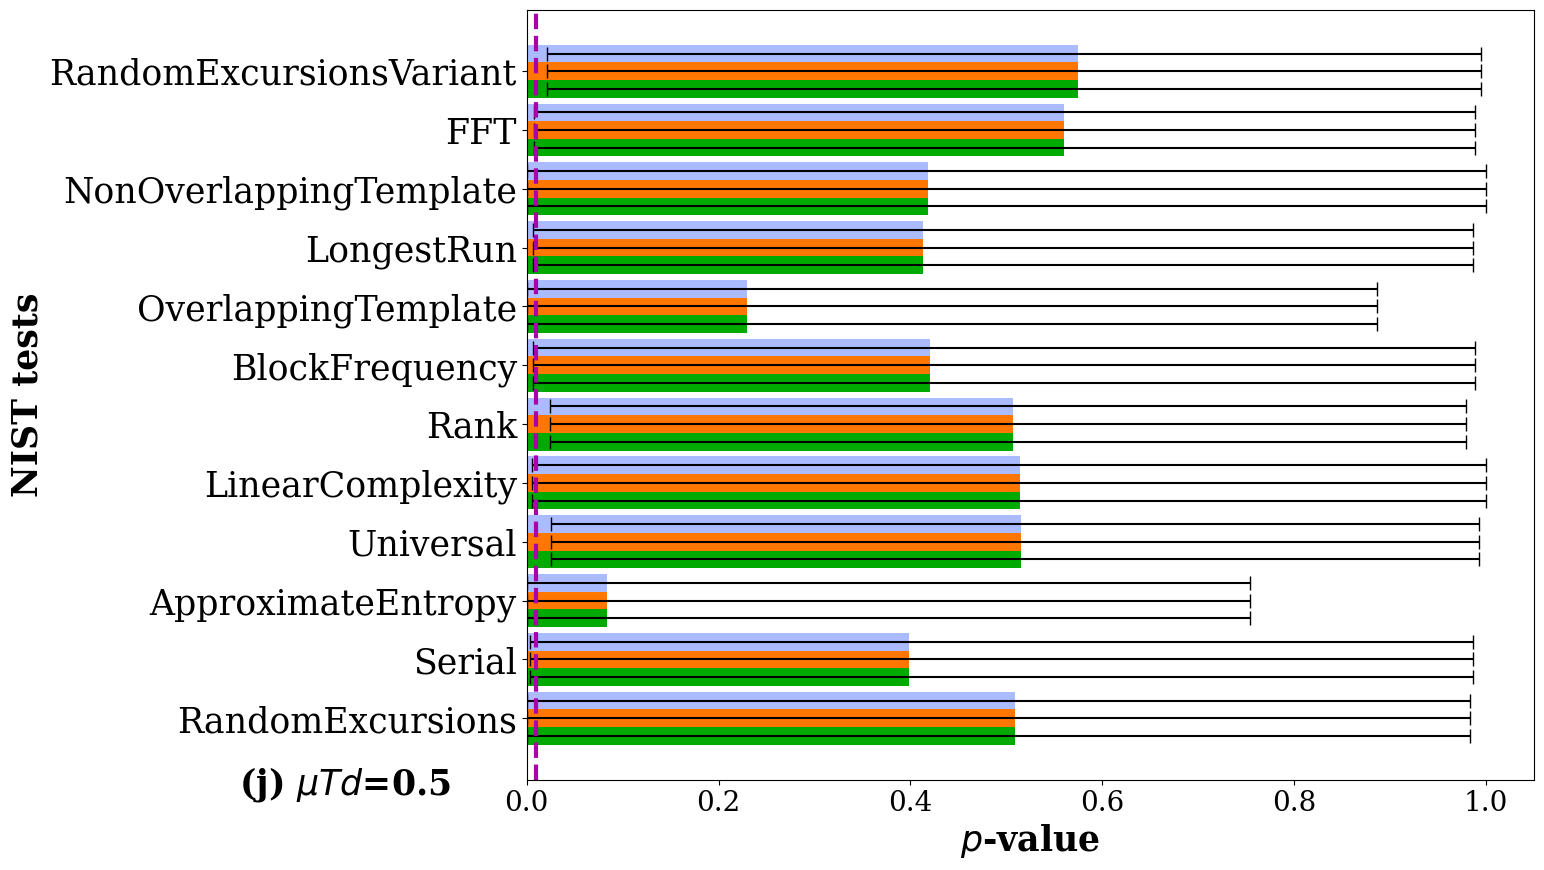

In [20]:
from matplotlib.pyplot import subplots, savefig, show, xlabel, ylabel, yticks
from numpy import array, average, subtract, arange
from os import listdir, path

loc = f'Stat_test/NIST/{muTd}/{i}'    # Location of NIST results
    
NUM = 3    # Number od datafiles for each muTd
inp = [i/20 for i in range(1, 11)]
txt = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
for muTd, ind in zip(inp, txt):    # Different values for muTd
    pVal = []    # Average p-values for data
    _min = []    # Minimum of p-values
    _max = []    # Maximum of p-values
    for i in range(NUM):    # Different datafiles
        pVal.append([])
        _min.append([])
        _max.append([])
        p_val = {}    # p-values as NIST results
        for folder in listdir(loc):
            fol = path.join(loc, folder)
            if path.isdir(fol):    # Each directory contains results for each tests
                if folder not in list(p_val.keys()):
                    p_val[folder] = []
                # Get results
                with open(f'{fol}/results.txt', 'r') as f:
                    lines = f.readlines()
                    for l in lines:
                        if float(l):
                            p_val[folder].append(float(l))
        tests = list(p_val.keys())    # NIST tests
        # For each test find average, minimum, maximum of p-values
        for test in tests:
            if p_val[test]:
                pVal[i].append(average(p_val[test]))
                _min[i].append(min(p_val[test]))
                _max[i].append(max(p_val[test]))
            else:
                pVal[i].append(0)
                _min[i].append(0)
                _max[i].append(0)
    # Get tests with p-values < 0.01 (i.e., failed tests)
    remove = []
    for j in range(len(tests)):
        flag = True
        for i in range(NUM):
            if pVal[i][j] >= 0.01:
                flag = False
                break
        if flag:
            remove.append(j)
    # Remove failed tests
    for j in range(len(remove)):
        for i in range(NUM):
            del pVal[i][remove[j]-j]
            del _min[i][remove[j]-j]
            del _max[i][remove[j]-j]
        del tests[remove[j]-j]
    
    # Plot p-values as bar chart
    barWidth = 0.3
    br0 = arange(len(tests))
    br1 = [x + barWidth for x in br0]
    br2 = [x + barWidth for x in br1]
    _, ax = subplots(1, 1)
    ax.barh(br0, pVal[0], xerr = [subtract(pVal[0], _min[0]), subtract(_max[0], pVal[0])], capsize = 5, color ='#0a0', height = barWidth)
    ax.barh(br1, pVal[1], xerr = [subtract(pVal[1], _min[1]), subtract(_max[1], pVal[1])], capsize = 5, color ='#f70', height = barWidth)
    ax.barh(br2, pVal[2], xerr = [subtract(pVal[2], _min[2]), subtract(_max[2], pVal[2])], capsize = 5, color ='#abf', height = barWidth)
    ax.axvline(x=0.01, color = '#a0a', ls = '--', lw = 3)
    ax.text(-0.3, -1.5+float(muTd), f'({ind}) ' + r'$\mu Td$=' + f'{muTd}', weight = 'bold', fontsize = 25)
    xlabel(r'$p$-value', fontweight ='bold', fontsize = 25) 
    ylabel('NIST tests', fontweight ='bold', fontsize = 25) 
    yticks([r + barWidth for r in range(len(tests))], tests)
    savefig(f'nist_pval{ind}.png', format="png", bbox_inches="tight")
    show()

## NIST Result

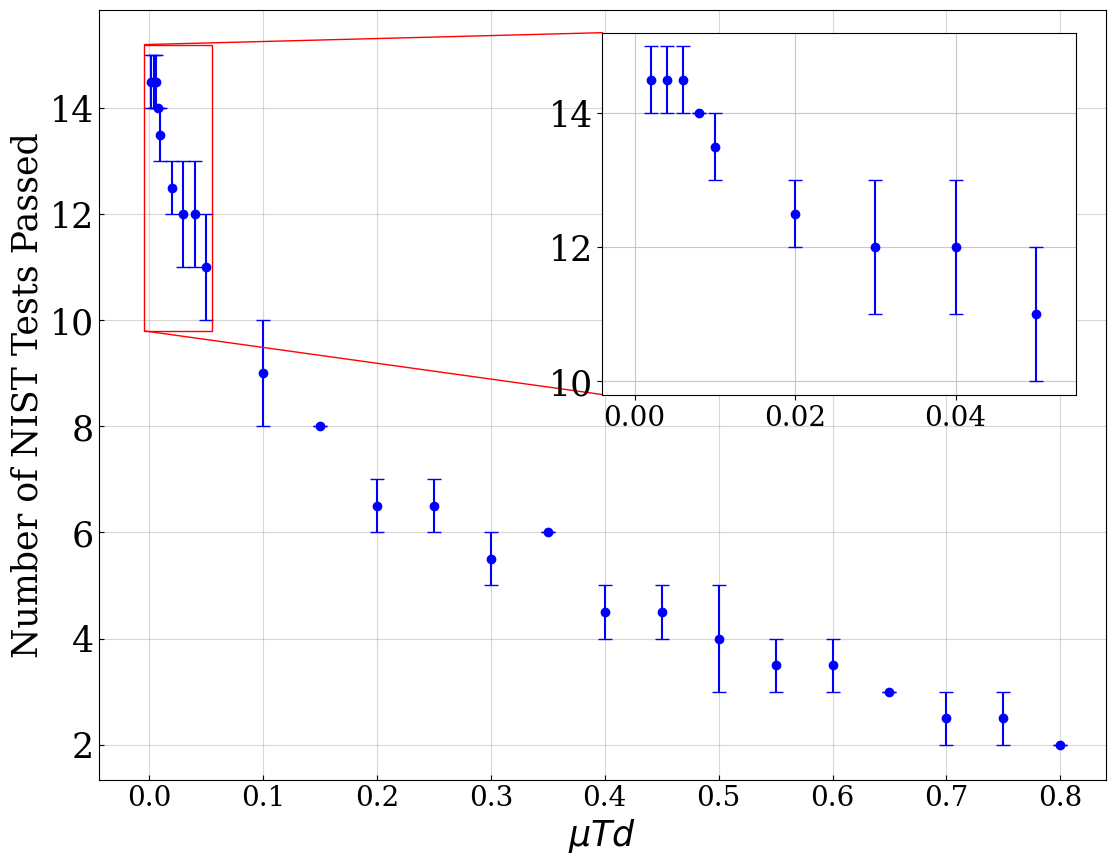

In [31]:
from matplotlib.pyplot import figure, tick_params, savefig, show

inp = [i/1000 for i in range(2, 9, 2)] + [i/100 for i in range(1, 5)] + [i/20 for i in range(1, 17)]
# Collected from NIST results
_min = [14, 14, 14, 14, 13, 12, 11, 11, 10, 8, 8, 6, 6, 5, 6, 4, 4, 3, 3, 3, 3, 2, 2, 2]
_max = [15, 15, 15, 14, 14, 13, 13, 13, 12, 10, 8, 7, 7, 6, 6, 5, 5, 5, 4, 4, 3, 3, 3, 2]
test = [(u+l)/2 for u, l in zip(_max, _min)]

fig = figure()
ax = fig.add_subplot()

ax.errorbar(inp, test, fmt = 'o', yerr = [[t-m for t, m in zip(test, _min)], [m-t for t, m in zip(test, _max)]], capsize = 5, color = '#00f')

ax.set_xlabel(r'$\mu Td$')
ax.set_ylabel('Number of NIST Tests Passed')
ax.grid(True, alpha = 0.5)

x1, x2, y1, y2 = -0.004, 0.055, 9.8, 15.2  # subregion of the original image
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47], xlim = (x1, x2), ylim = (y1, y2))

axins.errorbar(inp[:9], test[:9], fmt = 'o', yerr = [[t-m for t, m in zip(test, _min)][:9], [m-t for t, m in zip(test, _max)][:9]], capsize = 5, color = '#00f')
axins.grid(True, alpha = 0.7)

ax.indicate_inset_zoom(axins, edgecolor = "r", alpha = 1)

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig('nist.png', format="png", bbox_inches="tight")

show()

## Dieharder

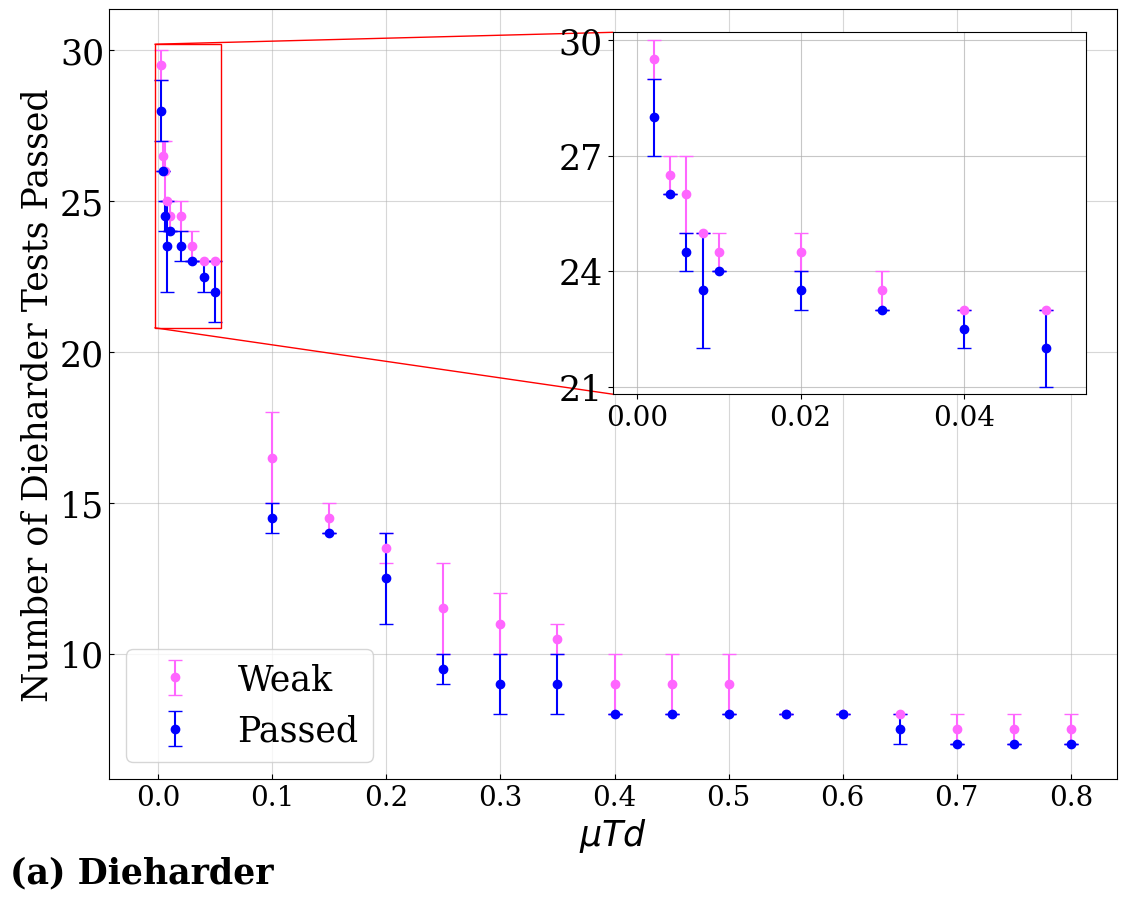

In [21]:
from matplotlib.pyplot import figure, tick_params, savefig, show, legend

inp = [0.45, 0.01, 0.004, 0.3, 0.75, 0.006, 0.05, 0.1, 0.002, 0.8, 0.5, 0.008, 0.02, 0.2, 0.35, 0.7, 0.65, 0.03, 0.55, 0.15, 0.04, 0.25, 0.4, 0.6]
# Collected from Dieharder results
_maxp = [8, 24, 26, 10, 7, 25, 23, 15, 29, 7, 8, 25, 24, 14, 10, 7, 8, 23, 8, 14, 23, 10, 8, 8]
_minp = [8, 24, 26, 8, 7, 24, 21, 14, 27, 7, 8, 22, 23, 11, 8, 7, 7, 23, 8, 14, 22, 9, 8, 8]
_maxw = [10, 25, 27, 12, 8, 27, 23, 18, 30, 8, 10, 25, 25, 14, 11, 8, 8, 24, 8, 15, 23, 13, 10, 8]
_minw = [8, 24, 26, 10, 7, 25, 23, 15, 29, 7, 8, 25, 24, 13, 10, 7, 8, 23, 8, 14, 23, 10, 8, 8]
testp = [(u+l)/2 for u, l in zip(_maxp, _minp)]
testw = [(u+l)/2 for u, l in zip(_maxw, _minw)]

fig = figure()
ax = fig.add_subplot()

ax.errorbar(inp, testw, fmt = 'o', yerr = [[t-m for t, m in zip(testw, _minw)], [m-t for t, m in zip(testw, _maxw)]], capsize = 5, label = 'Weak', color = '#f6f')
ax.errorbar(inp, testp, fmt = 'o', yerr = [[t-m for t, m in zip(testp, _minp)], [m-t for t, m in zip(testp, _maxp)]], capsize = 5, label = 'Passed', color = '#00f')

ax.set_xlabel(r'$\mu Td$')
ax.set_ylabel('Number of Dieharder Tests Passed')
ax.grid(True, alpha = 0.5)

x1, x2, y1, y2 = -0.003, 0.055, 20.8, 30.2  # subregion of the original image
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47], xlim = (x1, x2), ylim = (y1, y2))

axins.errorbar(inp, testw, fmt = 'o', yerr = [[t-m for t, m in zip(testw, _minw)], [m-t for t, m in zip(testw, _maxw)]], capsize = 5, color = '#f6f')
axins.errorbar(inp, testp, fmt = 'o', yerr = [[t-m for t, m in zip(testp, _minp)], [m-t for t, m in zip(testp, _maxp)]], capsize = 5, color = '#00f')
axins.set_yticks([21, 24, 27, 30])
axins.grid(True, alpha = 0.7)

ax.indicate_inset_zoom(axins, edgecolor = "r", alpha = 1)

ax.text(-0.13, 2.4, '(a) Dieharder', weight = 'bold', fontsize = 25)

legend()

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig('Die.png', format="png", bbox_inches="tight")

show()

## AIS

/tmp/ipykernel_1367591/3571900141.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend()


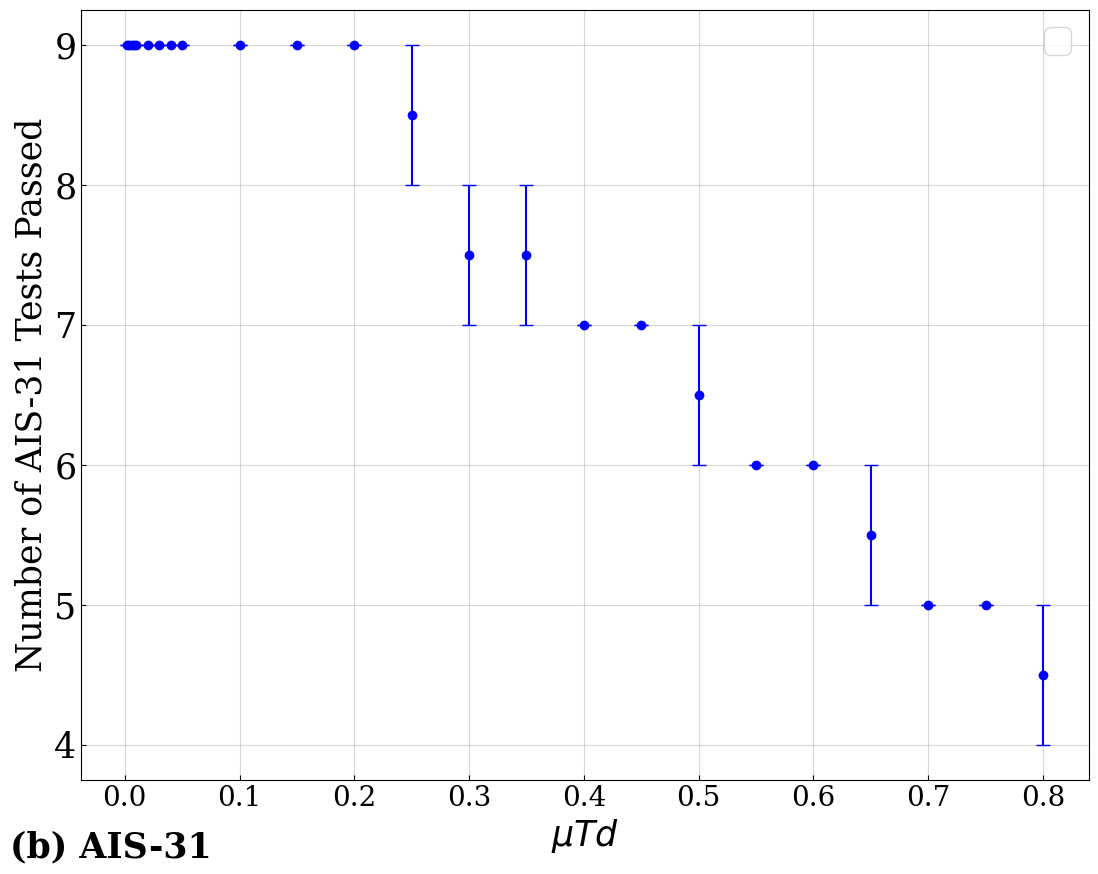

In [22]:
from matplotlib.pyplot import figure, tick_params, savefig, show, legend

inp = [i/1000 for i in range(2, 9, 2)] + [i/100 for i in range(1, 5)] + [i/20 for i in range(1, 17)]
# Collected from Dieharder results
_min = [9] * 12 + [8, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 4]
_max = [9] * 12 + [9, 8, 8, 7, 7, 7, 6, 6, 6, 5, 5, 5]
test = [(u+l)/2 for u, l in zip(_max, _min)]

fig = figure()
ax = fig.add_subplot()

ax.errorbar(inp, test, fmt = 'o', yerr = [[t-m for t, m in zip(test, _min)], [m-t for t, m in zip(test, _max)]], capsize = 5, color = '#00f')

ax.set_xlabel(r'$\mu Td$')
ax.set_ylabel('Number of AIS-31 Tests Passed')
ax.grid(True, alpha = 0.5)

ax.text(-0.1, 3.2, '(b) AIS-31', weight = 'bold', fontsize = 25)

legend()

tick_params(axis = 'both', which = 'both', direction = 'in')

savefig('AIS.png', format="png", bbox_inches="tight")

show()

## ENT

<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:29: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1367591/3314031841.py:24: SyntaxWarning: invalid escape sequence '\d'
  chi.append(float(findall("\d+\.\d+", lines[5][50:])[0]))
/tmp/ipykernel_1367591/3314031841.py:29: SyntaxWarning: invalid escape sequence '\d'
  cor.append(abs(float(findall("\d+\.\d+", lines[10][34:44])[0])))


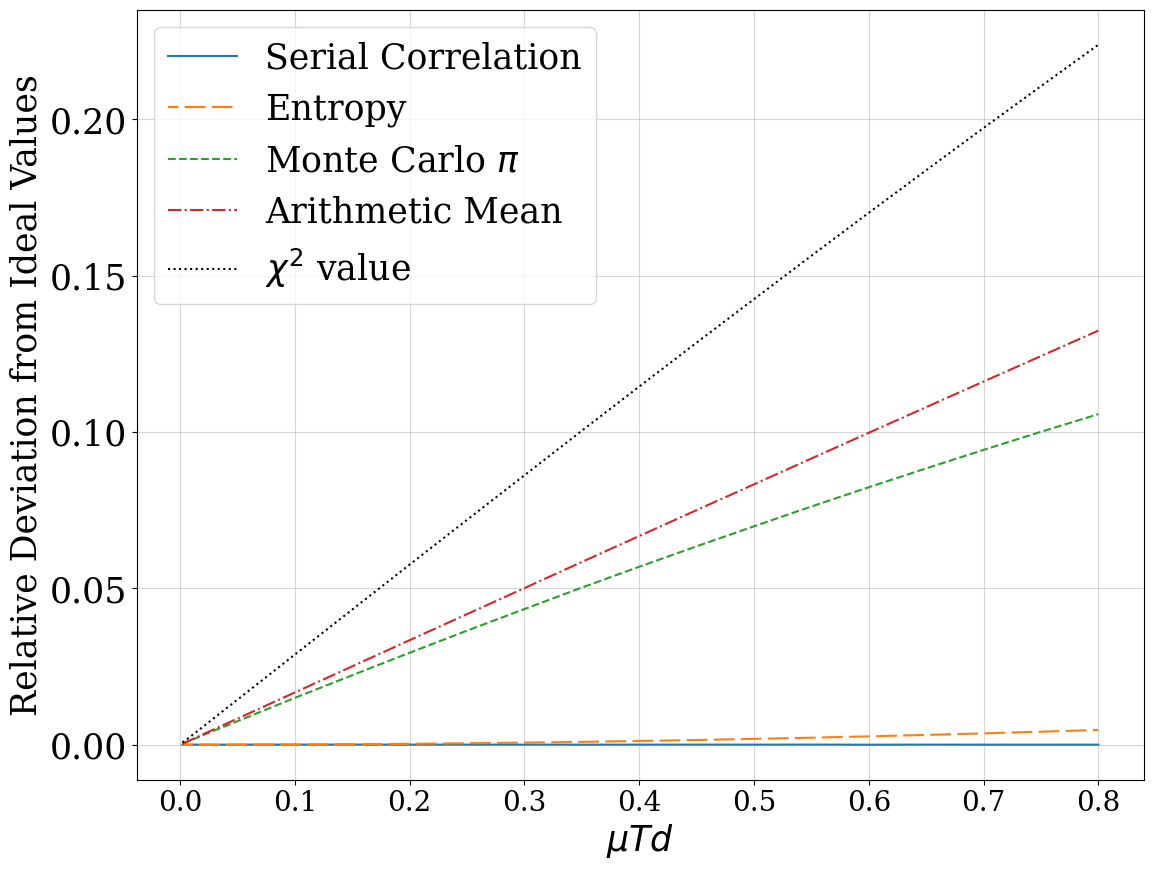

In [30]:
from matplotlib.pyplot import figure, tick_params, savefig, show, legend
from os import listdir, path
from re import findall
from math import sqrt

entropy = []
chi = []
mean = []
pi = []
cor = []
inp = [i/1000 for i in range(2, 9, 2)] + [i/100 for i in range(1, 5)] + [i/20 for i in range(1, 17)]

# Get AIS results
directory = './Stat_test/ENT'    # Location of AIS results
dirlist = listdir(directory)
for mu_Td in inp:
    if mu_Td in [i/10 for i in range(1, 9)]:
        mu_Td = f'{mu_Td}0'
    for i in range(3):
        with open(path.join(directory, f'Act1GB_{mu_Td}_{i}'), 'r') as file:
            lines = file.readlines()
        entropy.append(float(lines[0][10:19]))
        entropy[-1] = (8-entropy[-1])/8
        chi.append(float(findall("\d+\.\d+", lines[5][50:])[0]))
        chi[-1] = sqrt(chi[-1]/(chi[-1]+1e9))
        mean.append(float(lines[8][39:48]))
        mean[-1] = abs(127.5-mean[-1])/127.5
        pi.append(float(lines[9][47:52])/100)
        cor.append(abs(float(findall("\d+\.\d+", lines[10][34:44])[0])))

fig = figure()
ax = fig.add_subplot()

ax.plot(inp, [(a+b+c)/3 for a,b,c in zip(cor[::3], cor[1::3], cor[2::3])], label = 'Serial Correlation')
ax.plot(inp, [(a+b+c)/3 for a,b,c in zip(entropy[::3], entropy[1::3], entropy[2::3])], label = 'Entropy', ls = (5, (10,3)))
ax.plot(inp, [(a+b+c)/3 for a,b,c in zip(pi[::3], pi[1::3], pi[2::3])], label = r'Monte Carlo $\pi$', ls = '--')
ax.plot(inp, [(a+b+c)/3 for a,b,c in zip(mean[::3], mean[1::3], mean[2::3])], label = 'Arithmetic Mean', ls = '-.')
ax.plot(inp, [(a+b+c)/3 for a,b,c in zip(chi[::3], chi[1::3], chi[2::3])], label = r'$\chi^2$ value', ls = ':', color = 'k')

ax.set_xlabel(r'$\mu Td$')
ax.set_ylabel('Relative Deviation from Ideal Values')
ax.grid(True, alpha = 0.5)

ax.legend(fontsize = 25, loc = 0)

savefig('ENT.png', format="png", bbox_inches="tight")
show()